In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix

import mplpresets
import plotfunctions
import pfdupe

In [2]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

Text(0, 0.5, 'counts')

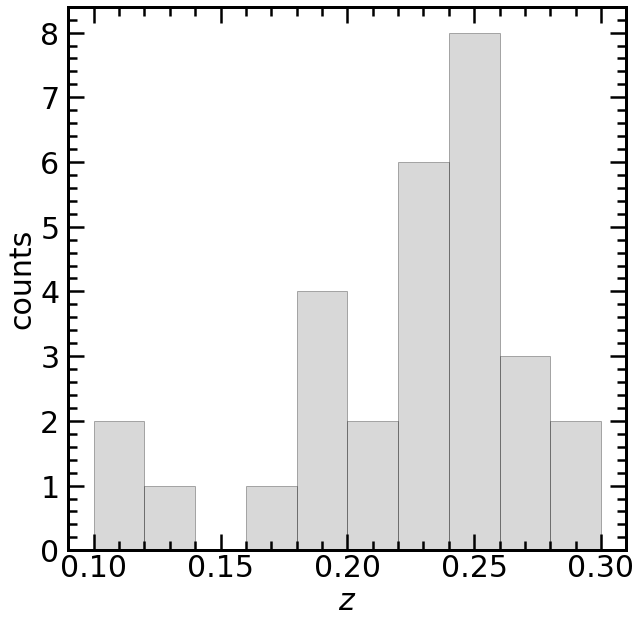

In [14]:
plt.figure(figsize=(10,10))
plt.hist(fullmergedf['Z_50'], bins=[.1, .12,.14, .16,.18, .2, .22,.24, .26,.28,.30], alpha=.3, color='gray', ec='black')
plt.xlabel('$z$')
plt.ylabel('counts')

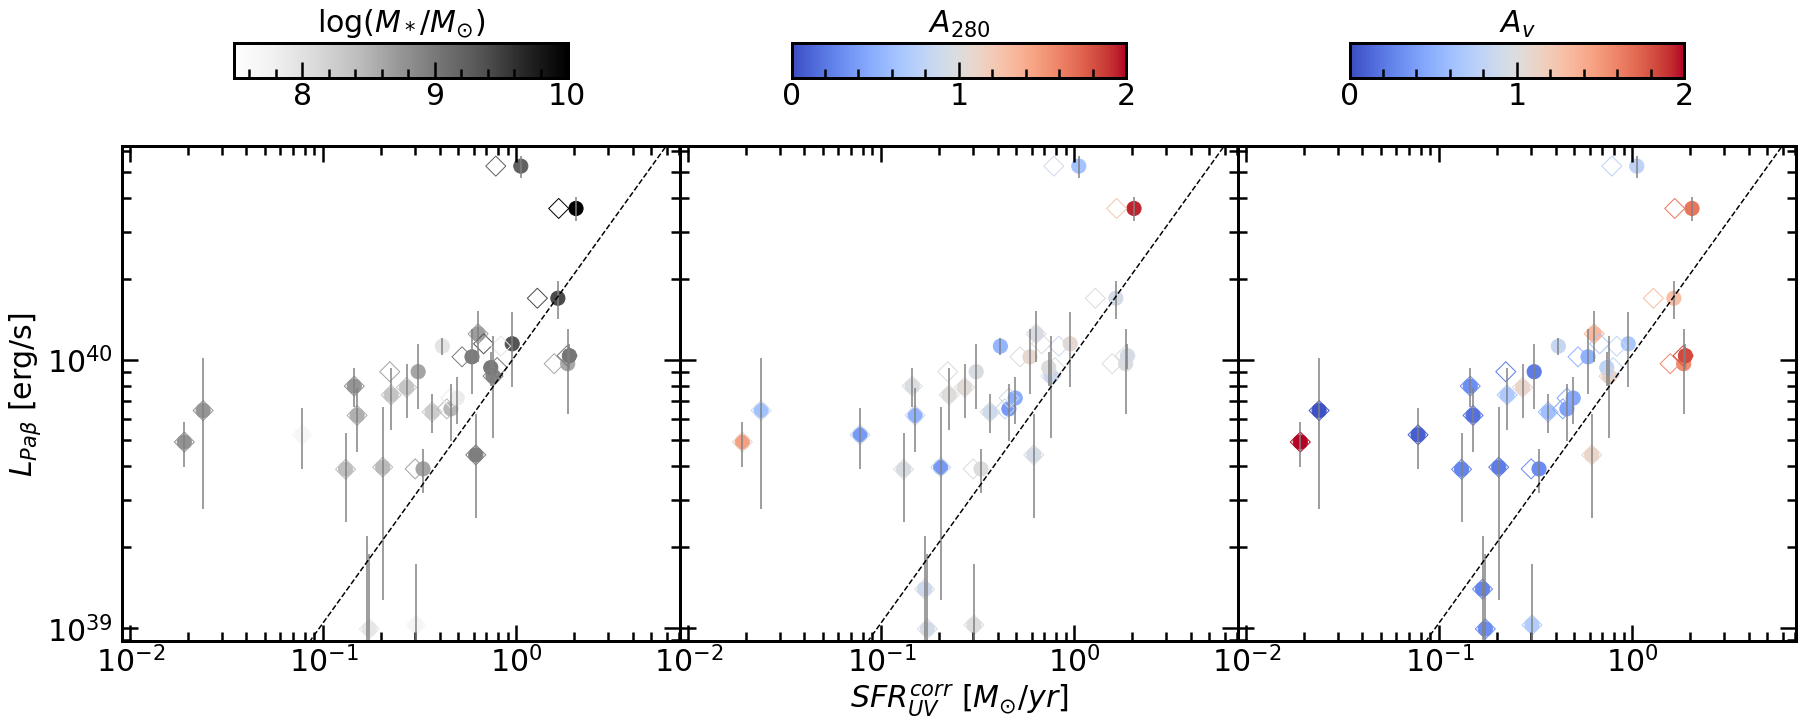

In [188]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='Greys')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='Greys', marker = 'D')
scatterdots.set_facecolor('none') 
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_A_UV_280'], cmap='coolwarm', vmin = 0 , vmax = 2)
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_A_UV_280'], cmap='coolwarm', marker = 'D', vmin = -3 , vmax = 5)
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2, marker = 'D')
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$A_{280}$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

plt.show()

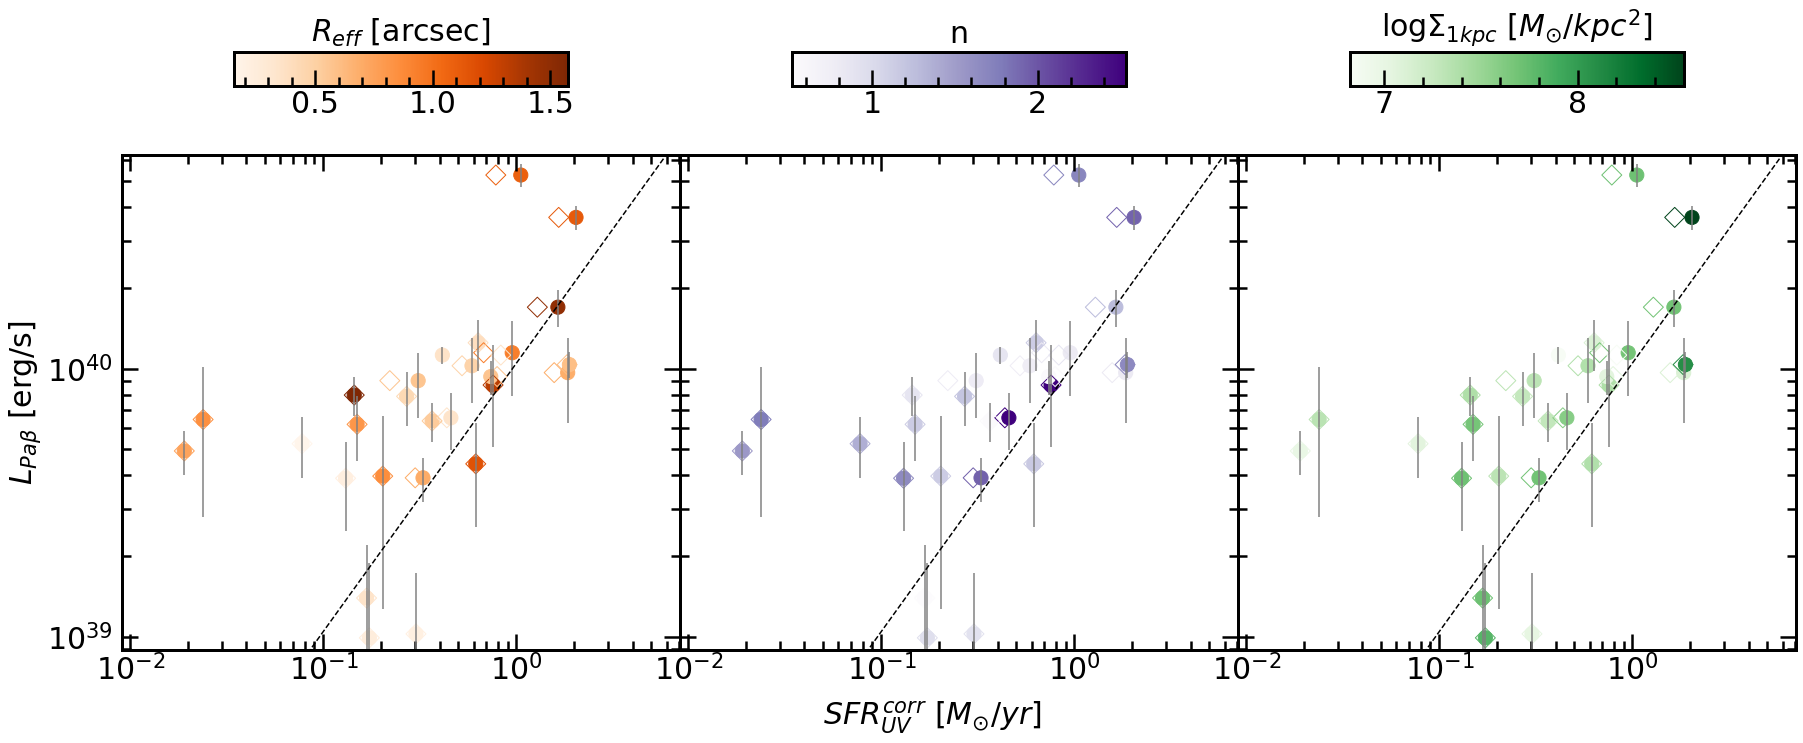

In [189]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='Oranges')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='Oranges', marker = 'D')
scatterdots.set_facecolor('none') 
#ax0.scatter(10**ylpab , 10**xlpab, s = 10 , c = 'black')
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='Purples')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='Purples', marker = 'D')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='Greens')
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-2 , max(fullmergedf['ir_SFR-UV_corr']) + 5 , min(fullmergedf['PAB_L']) - 10**38, max(fullmergedf['PAB_L'])  + 10**40])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='Greens', marker = 'D')
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'n')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14]) 
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

fig.text(0.5,0.04, r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]", ha="center", va="center")
plt.show()

In [190]:
lmre = linmix.LinMix(dcmorphdf['gf_re_j_x'] , dcmorphdf['sfrratio_calz'], dcmorphdf['gf_dre_j_x'], dcmorphdf['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmre.run_mcmc(silent = True) 

lmn = linmix.LinMix(dcmorphdf['gf_n_j_x'] , dcmorphdf['sfrratio_calz'], dcmorphdf['gf_dn_j_x'], dcmorphdf['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmn.run_mcmc(silent = True) 

lmsigma = linmix.LinMix(dcmorphdf['SIGMA_1_x'] , dcmorphdf['sfrratio_calz'], [.3]*len(dcmorphdf), dcmorphdf['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmsigma.run_mcmc(silent = True) 

No handles with labels found to put in legend.


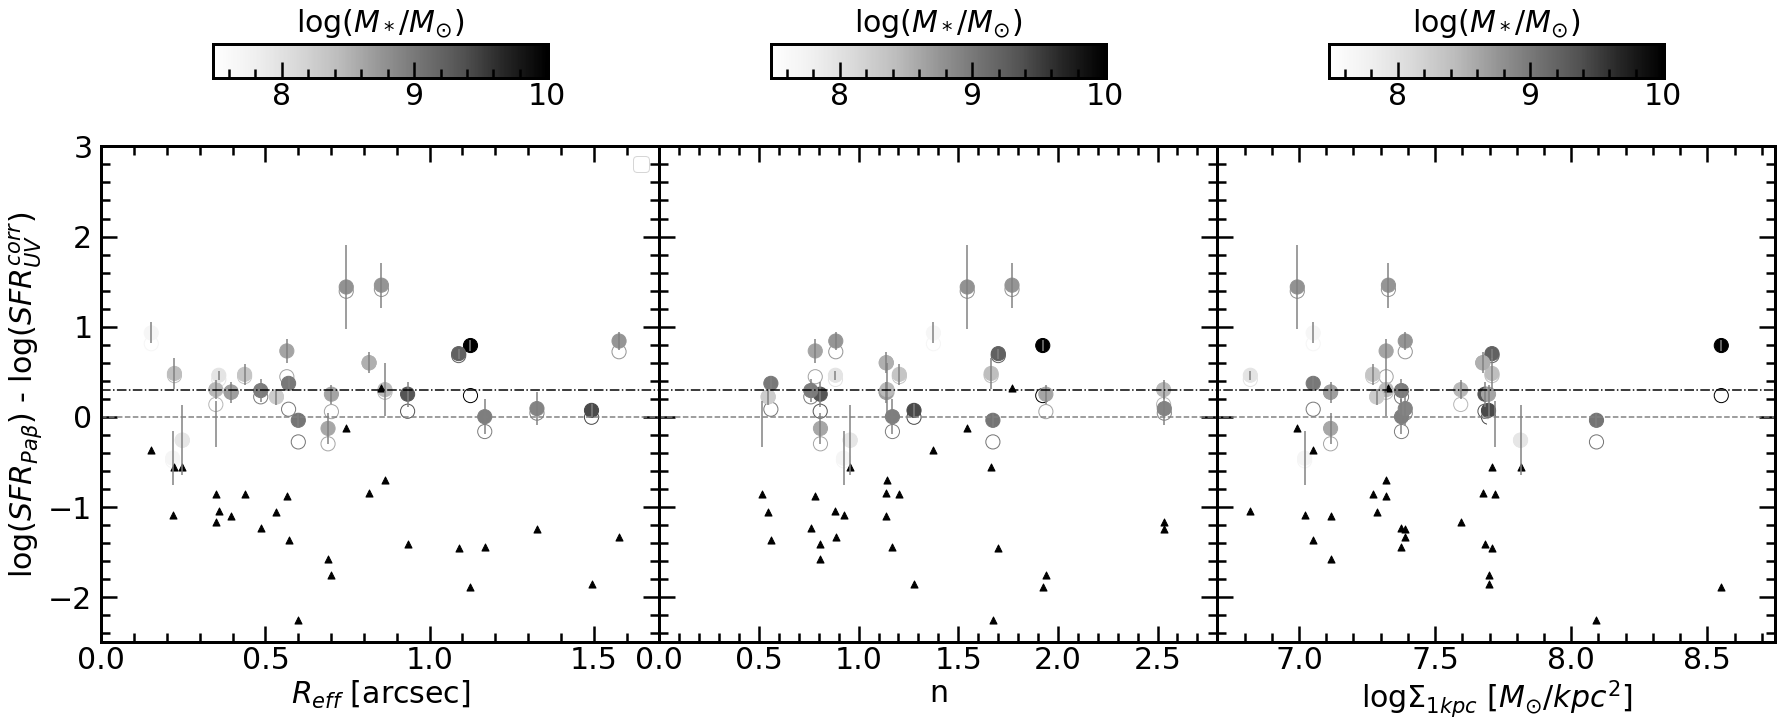

In [221]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"$R_{eff}$ [arcsec]")
y0 = ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'Greys')
y0.set_facecolor('none')
y0dc = ax0.scatter(dcmorphdf['gf_re_j_x'] , dcmorphdf['sfrratio_calz'] , s = 200 , c = dcmorphdf['td_lmass_x'] , cmap = 'Greys')
# scatterdots0 = ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = '' , marker = 'D')
# scatterdots0.set_facecolor('none')
ax0.errorbar(dcmorphdf['gf_re_j_x'], dcmorphdf['sfrratio_calz'], yerr = dcmorphdf['PAB_SFR_EX2_ERR_x'], c = 'gray',  linestyle = 'None')
ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax0.axis([0 , 1.7 , -2.5 , 3])
ax0.plot([0 , 2] , [0.3 , 0.3] , '-.' , c = 'black')
ax0.plot([0 , 2] , [0 , 0] , '--' , c = 'gray')
# for i in range(0, len(lmre.chain), 25):
#     xs = np.arange(-4,4)
#     ys = lmre.chain[i]['alpha'] + xs * lmre.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.01)
# ax0.plot([0 , 2] , [np.mean(lmre.chain['alpha']) + np.mean(lmre.chain['beta'])*0 , np.mean(lmre.chain['alpha']) + np.mean(lmre.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmre.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmre.chain['beta']), 2))  )
# #ax0.plot(xs, ys, color='k')
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'Greys')
y1.set_facecolor('none')
y1dc = ax1.scatter(dcmorphdf['gf_n_j_x'] , dcmorphdf['sfrratio_calz'] , s = 200 , c = dcmorphdf['td_lmass_x'] , cmap = 'Greys')
# scatterdots1 = ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'Greys' , marker = 'D')
# scatterdots1.set_facecolor('none')
ax1.errorbar(dcmorphdf['gf_n_j_x'] , dcmorphdf['sfrratio_calz'] , yerr = dcmorphdf['PAB_SFR_EX2_ERR_x'] , c = 'gray',  linestyle = 'None')
ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax1.plot([0 , 8] , [0.3 , 0.3] , '-.' , c = 'black')
ax1.plot([0 , 8] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"n")
ax1.axis([0 , 2.8 , -2.5 , 3])
ax1.tick_params(labelleft = False)
# for i in range(0, len(lmn.chain), 25):
#     xsn = np.arange(-4,4)
#     ysn = lmn.chain[i]['alpha'] + xsn * lmn.chain[i]['beta']
#     ax1.plot(xsn, ysn, color='gray', alpha=0.01)

# ax1.plot([0 , 8] , [np.mean(lmn.chain['alpha']) + np.mean(lmn.chain['beta'])*0 , np.mean(lmn.chain['alpha']) + np.mean(lmn.chain['beta'])*8] , c = 'black' , label = 'm = ' + str(round(np.mean(lmn.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmn.chain['beta']), 2)))
# ax1.legend()

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'Greys')
y2.set_facecolor('none')
y2dc = ax2.scatter(dcmorphdf['SIGMA_1_x'] , dcmorphdf['sfrratio_calz'] , s = 200 , c = dcmorphdf['td_lmass_x'] , cmap = 'Greys')
# scatterdots2 = ax1.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'Greys' , marker = 'D')
# scatterdots2.set_facecolor('none')
ax2.errorbar(dcmorphdf['SIGMA_1_x'] , dcmorphdf['sfrratio_calz'] , yerr = dcmorphdf['PAB_SFR_EX2_ERR_x'] , c = 'gray',  linestyle = 'None')
ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax2.plot([0 , 10] , [0.3 , 0.3] , '-.' , c = 'black')
ax2.axis([6.7 , 8.75 , -2.5 , 3])
ax2.plot([0 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.tick_params(labelleft = False)
# for i in range(0, len(lmsigma.chain), 25):
#     xs = np.arange(3 , 11)
#     ys = lmsigma.chain[i]['alpha'] + xsn * lmsigma.chain[i]['beta']
#     ax2.plot(xs, ys, color='gray', alpha=0.05)
# #ax1.plot(xsn, ysn, color='k')
# ax2.plot([0 , 10] , [np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*0 , np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*10] , c = 'black' , label ='m = ' + str(round(np.mean(lmsigma.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmsigma.chain['beta']), 2)))
# ax2.legend(loc = 'upper left')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')
plt.show()

In [41]:
dcmorphdfn = dcmorphdf[dcmorphdf['ir_UV_beta_x'] < 1].copy()
morphdfn = morphdf[morphdf['ir_UV_beta'] < 1].copy()

In [40]:
lmreneg = linmix.LinMix(dcmorphdfn['gf_re_j_x'] , dcmorphdfn['sfrratio_calz'], dcmorphdfn['gf_dre_j_x'], dcmorphdfn['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmreneg.run_mcmc(silent = True) 

lmnneg = linmix.LinMix(dcmorphdfn['gf_n_j_x'] , dcmorphdfn['sfrratio_calz'], dcmorphdfn['gf_dn_j_x'], dcmorphdfn['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmnneg.run_mcmc(silent = True) 

lmsigmaneg = linmix.LinMix(dcmorphdfn['SIGMA_1_x'] , dcmorphdfn['sfrratio_calz'], [.3]*len(dcmorphdfn), dcmorphdfn['PAB_SFR_EX2_ERR_x'] , K = 2, seed = 2)
lmsigmaneg.run_mcmc(silent = True) 

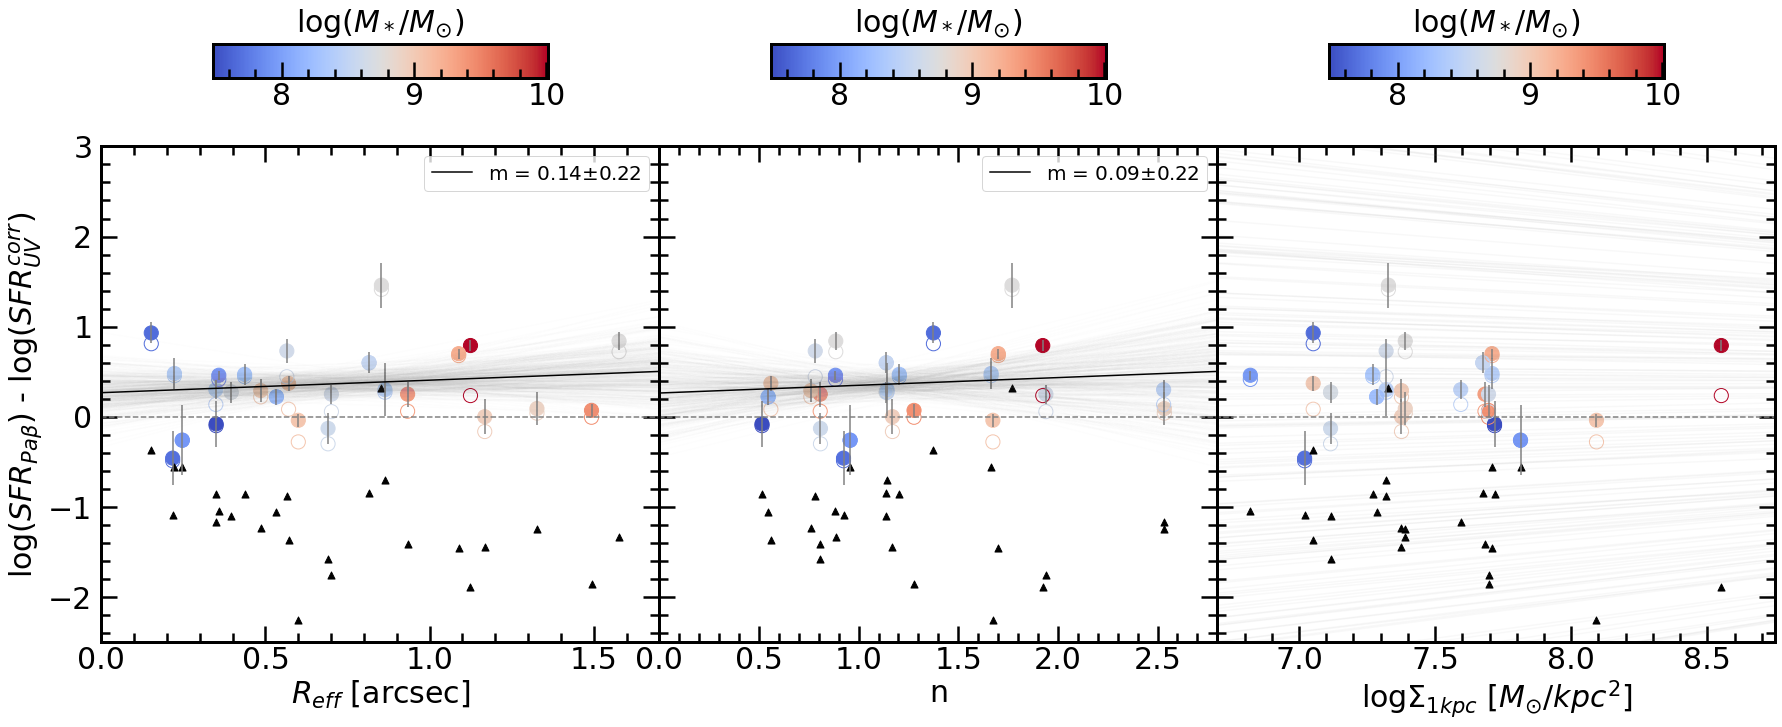

In [47]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"$R_{eff}$ [arcsec]")
y0 = ax0.scatter(dcmorphdfn['gf_re_j_x'] , dcmorphdfn['sfrratio_calz'] , s = 200 , c = dcmorphdfn['td_lmass_x'] , cmap = 'coolwarm')
scatterdots0 = ax0.scatter(morphdfn['gf_re_j'] , morphdfn['PAB_SFR_EX2'] , s = 200 , c = morphdfn['td_lmass'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.errorbar(dcmorphdfn['gf_re_j_x'] , dcmorphdfn['sfrratio_calz'] , yerr = morphdfn['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax0.scatter(morphdfn['gf_re_j'], morphdfn['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax0.axis([0 , 1.7 , -2.5 , 3])
ax0.plot([0 , 2] , [0 , 0] , '--' , c = 'gray')
for i in range(0, len(lmreneg.chain), 25):
    xs = np.arange(-4,4)
    ys = lmreneg.chain[i]['alpha'] + xs * lmreneg.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.01)
ax0.plot([0 , 2] , [np.mean(lmreneg.chain['alpha']) + np.mean(lmreneg.chain['beta'])*0 , np.mean(lmreneg.chain['alpha']) + np.mean(lmreneg.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmreneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmreneg.chain['beta']), 2))  )
#ax0.plot(xs, ys, color='k')
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(dcmorphdfn['gf_n_j_x'] , dcmorphdfn['sfrratio_calz'] , s = 200 , c = dcmorphdfn['td_lmass_x'] , cmap = 'coolwarm')
scatterdots1 = ax1.scatter(morphdfn['gf_n_j'] , morphdfn['PAB_SFR_EX2'] , s = 200 , c = morphdfn['td_lmass'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmorphdfn['gf_n_j_x'] , dcmorphdfn['sfrratio_calz'] , yerr = morphdfn['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax1.scatter(morphdfn['gf_n_j'], morphdfn['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax1.plot([0 , 8] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"n")
ax1.axis([0 , 2.8 , -2.5 , 3])
ax1.tick_params(labelleft = False)
for i in range(0, len(lmnneg.chain), 25):
    xsn = np.arange(-4,4)
    ysn = lmnneg.chain[i]['alpha'] + xsn * lmnneg.chain[i]['beta']
    ax1.plot(xsn, ysn, color='gray', alpha=0.01)

ax1.plot([0 , 8] , [np.mean(lmnneg.chain['alpha']) + np.mean(lmnneg.chain['beta'])*0 , np.mean(lmnneg.chain['alpha']) + np.mean(lmnneg.chain['beta'])*8] , c = 'black' , label = 'm = ' + str(round(np.mean(lmnneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmnneg.chain['beta']), 2)))
ax1.legend()

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(dcmorphdfn['SIGMA_1_x'] , dcmorphdfn['sfrratio_calz'] , s = 200 , c = dcmorphdfn['td_lmass_x'] , cmap = 'coolwarm')
scatterdots2 = ax2.scatter(morphdfn['SIGMA_1'] , morphdfn['PAB_SFR_EX2'] , s = 200 , c = morphdfn['td_lmass'] , cmap = 'coolwarm')
scatterdots2.set_facecolor('none')
ax2.errorbar(dcmorphdfn['SIGMA_1_x'] , dcmorphdfn['sfrratio_calz'] , yerr = morphdfn['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax2.scatter(morphdfn['SIGMA_1'], morphdfn['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax2.axis([6.7 , 8.75 , -2.5 , 3])
ax2.plot([0 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.tick_params(labelleft = False)
for i in range(0, len(lmsigmaneg.chain), 25):
    xs = np.arange(3 , 11)
    ys = lmsigmaneg.chain[i]['alpha'] + xsn * lmsigmaneg.chain[i]['beta']
    ax2.plot(xs, ys, color='gray', alpha=0.05)
#ax1.plot(xsn, ysn, color='k')
# ax2.plot([0 , 10] , [np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*0 , np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*10] , c = 'black' , label ='m = ' + str(round(np.mean(lmsigma.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmsigma.chain['beta']), 2)))
#ax2.legend(loc = 'upper left')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')
plt.show()

In [7]:
dcsampledfn = dcsampledf[dcsampledf.ir_UV_beta < 1].copy()

In [57]:
# lmmass = linmix.LinMix(dcsampledfn['td_lmass'], dcsampledfn['sfrratio_calz'], [.3]* len(dcsampledfn), dcsampledfn['PAB_SFR_EX2_ERR'], K = 2, seed = 2)
# lmmass.run_mcmc(silent = True) 

lmmassall = linmix.LinMix(dcsampledf['td_lmass'], dcsampledf['sfrratio_calz'], [.3]* len(dcsampledf), fullmergedf['PAB_SFR_EX2_ERR'], K = 2, seed = 2)
lmmassall.run_mcmc(silent = True) 

# lmbetaneg = linmix.LinMix(dcsampledfn['ir_UV_beta'],dcsampledfn['sfrratio_calz'], [.3]* len(dcsampledfn), dcsampledfn['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
# lmbetaneg.run_mcmc(silent = True) 

# lmbetapos = linmix.LinMix(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] > 0], [.3]* len(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0]), fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] > 0] , K = 2, seed = 2)
# lmbetapos.run_mcmc(silent = True) 

# lmbetaol = linmix.LinMix(dcsampledf['ir_UV_beta'], dcsampledf['sfrratio_calz'], [.3]* len(dcsampledf), dcsampledf['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
# lmbetaol.run_mcmc(silent = True) 

lma280 = linmix.LinMix(dcsampledf['ir_A_UV_280'], dcsampledf['sfrratio_calz'], [.3]* len(dcsampledf), dcsampledf['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
lma280.run_mcmc(silent = True) 

# lma280n = linmix.LinMix(dcsampledf['ir_A_UV_280'][dcsampledf['ir_A_UV_280'] < 1.2], dcsampledf['sfrratio_calz'][dcsampledf['ir_A_UV_280'] < 1.2], [.3]* len(dcsampledf[dcsampledf['ir_A_UV_280'] < 1.2]), dcsampledf['PAB_SFR_EX2_ERR'][dcsampledf['ir_A_UV_280'] < 1.2] , K = 2, seed = 2)
# lma280n.run_mcmc(silent = True) 


lmav = linmix.LinMix(dcsampledf['td_Av'], dcsampledf['sfrratio_calz'], [.3]* len(dcsampledf), dcsampledf['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
lmav.run_mcmc(silent = True)
# lmavneg = linmix.LinMix(dcsampledfn['td_Av'], dcsampledfn['sfrratio_calz'], [.3]* len(dcsampledfn), dcsampledfn['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
# lmavneg.run_mcmc(silent = True)

In [50]:
#display(dcsampledf)

In [213]:
print(np.mean(dcsampledf['sfrratio_calz']))
print(np.median(dcsampledf['sfrratio_calz']))
print(np.mean(dcsampledf['PAB_SFR_EX2']))
print(np.median(dcsampledf['PAB_SFR_EX2']))

0.37862068965517237
0.3
0.27608218200947776
0.2213978100011054


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


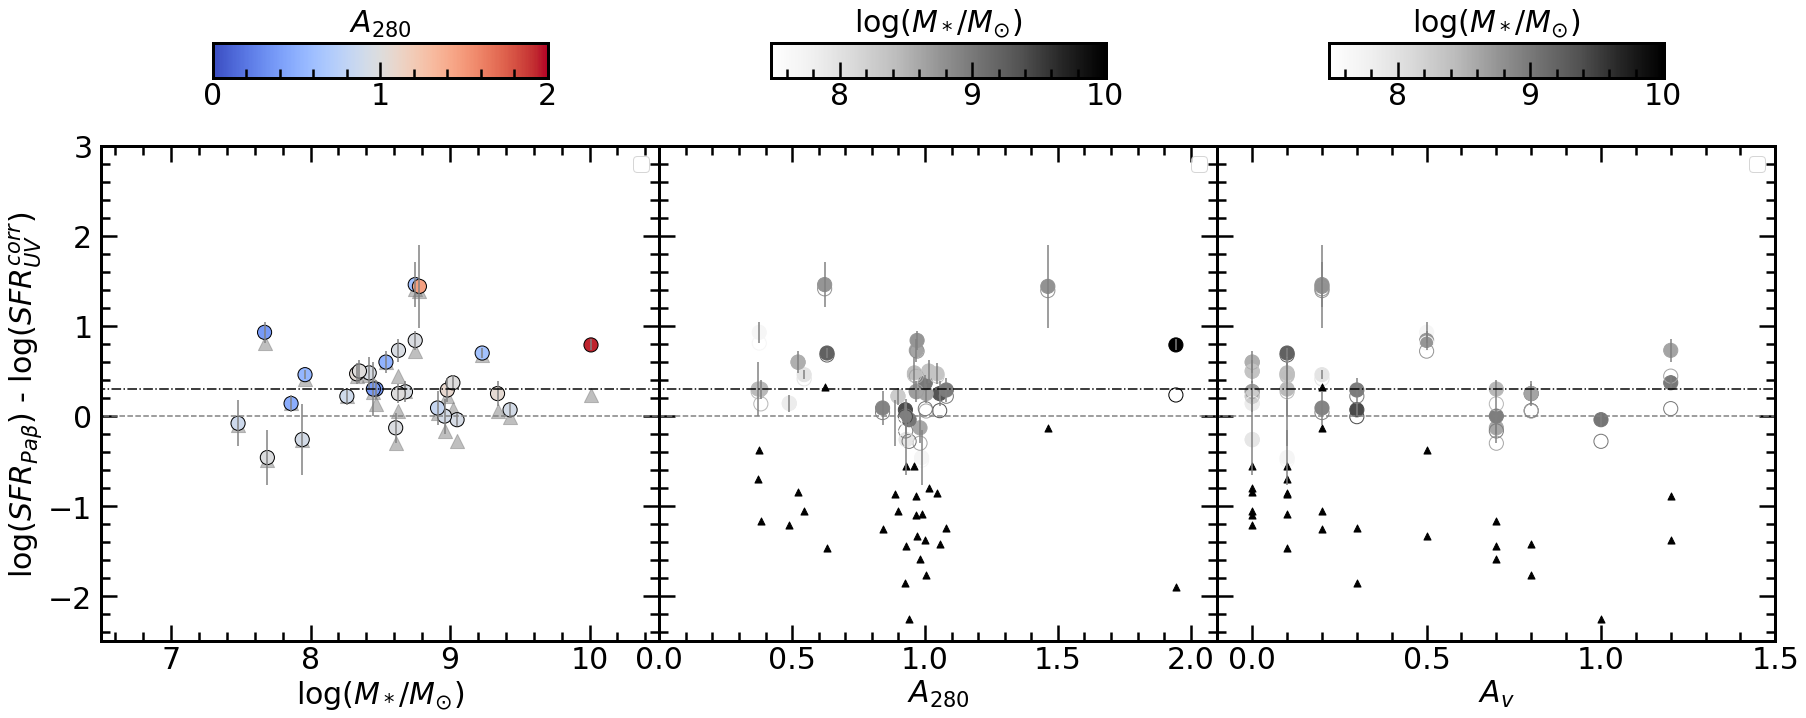

In [10]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
scatterdots0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = 'gray' , marker='^', alpha=.5 , vmin = 0 , vmax = 2)

y0 = ax0.scatter(dcsampledf['td_lmass'] , dcsampledf['sfrratio_calz'] , s = 200 , c = dcsampledf['ir_A_UV_280'], ec='black' , cmap = 'coolwarm' , vmin = 0 , vmax = 2)
ax0.errorbar(dcsampledf['td_lmass'] , dcsampledf['sfrratio_calz'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')

# scatterdots0.set_facecolor('none')
# ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
# for i in range(0, len(lmmass.chain), 25):
#     xs = np.arange(6,12)
#     ys = lmmass.chain[i]['alpha'] + xs * lmmass.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([6.5 , 10.5] , [np.mean(lmmass.chain['alpha']) + np.mean(lmmass.chain['beta'])*6.5 , np.mean(lmmass.chain['alpha']) + np.mean(lmmass.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmass.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmass.chain['beta']), 2))  )
# for i in range(0, len(lmmassall.chain), 25):
#     xs = np.arange(6,12)
#     ys = lmmassall.chain[i]['alpha'] + xs * lmmassall.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([6.5 , 10.5] , [np.mean(lmmassall.chain['alpha']) + np.mean(lmmassall.chain['beta'])*6.5 , np.mean(lmmassall.chain['alpha']) + np.mean(lmmassall.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmassall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmassall.chain['beta']), 2))  )
ax0.plot([6 , 11] , [0.3 , 0.3] , '-.' , c = 'black')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
ax0.axis([6.5 , 10.5 , -2.5 , 3])
ax0.legend()

#beta figure
ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(dcsampledf['ir_A_UV_280'] , dcsampledf['sfrratio_calz'] , s = 200 , c = dcsampledf['td_lmass'] , cmap = 'Greys')
scatterdots1 = ax1.scatter(fullmergedf['ir_A_UV_280'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'Greys')
scatterdots1.set_facecolor('none')
ax1.scatter(fullmergedf['ir_A_UV_280'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax1.errorbar(dcsampledf['ir_A_UV_280'] , dcsampledf['sfrratio_calz'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
# for i in range(0, len(lma280.chain), 25):
#     xs = np.arange(-2,6)
#     ys = lma280.chain[i]['alpha'] + xs * lma280.chain[i]['beta']
#     ax1.plot(xs, ys, color='gray', alpha=0.01)
# ax1.plot([-2 , 6] , [np.mean(lma280.chain['alpha']) + np.mean(lma280.chain['beta'])*-2 , np.mean(lma280.chain['alpha']) + np.mean(lma280.chain['beta'])*6] , c = 'black' , label = 'm = ' + str(round(np.mean(lma280.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lma280.chain['beta']), 2))  )
# ax1.plot([-2 , 6] , [np.mean(lma280n.chain['alpha']) + np.mean(lma280n.chain['beta'])*-2 , np.mean(lma280n.chain['alpha']) + np.mean(lma280n.chain['beta'])*6] , c = 'red' , label = 'm = ' + str(round(np.mean(lma280n.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lma280n.chain['beta']), 2))  )
ax1.plot([-2.5 , 4.5] , [0.3 , 0.3] , '-.' , c = 'black')
ax1.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"$A_{280}$")
ax1.axis([0 , 2.1 , -2.5 , 3])
ax1.tick_params(labelleft = False)
ax1.legend()

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(dcsampledf['td_Av'] , dcsampledf['sfrratio_calz'] , s = 200 , c = dcsampledf['td_lmass'] , cmap = 'Greys')
scatterdots2 = ax2.scatter(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'Greys')
scatterdots2.set_facecolor('none')
ax2.scatter(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax2.errorbar(dcsampledf['td_Av'] , dcsampledf['sfrratio_calz'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax2.plot([-2.5 , 4.5] , [0.3 , 0.3] , '-.' , c = 'black')
ax2.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax2.set_xlabel(r"$A_v$")
ax2.axis([-.1 , 1.5 , -2.5 , 3])
ax2.tick_params(labelleft = False)
# for i in range(0, len(lmav.chain), 25):
#     xs = np.arange(-.5,2)
#     ys = lmav.chain[i]['alpha'] + xs * lmav.chain[i]['beta']
#     ax2.plot(xs, ys, color='gray', alpha=0.03)
# ax2.plot([-.5 , 1.5] , [np.mean(lmav.chain['alpha']) + np.mean(lmav.chain['beta'])*-.5 , np.mean(lmav.chain['alpha']) + np.mean(lmav.chain['beta'])*1.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmav.chain['beta']), 2))  )
ax2.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$A_{280}$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

plt.show()

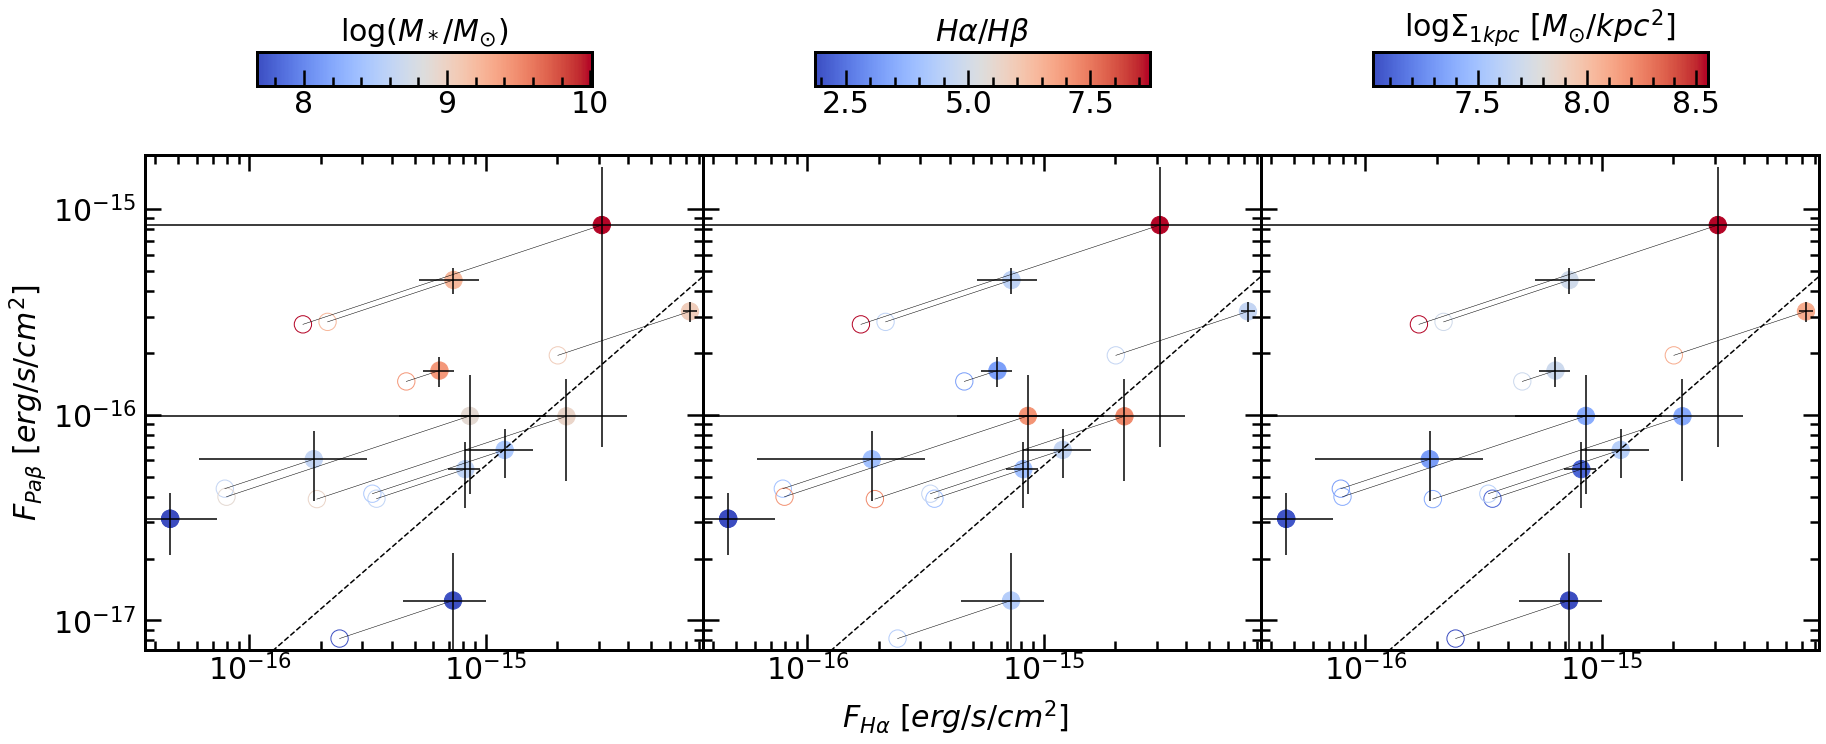

In [5]:
xha = np.linspace(10**-17 , 10**-14 , num = 10000)
yha = xha/17.6

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$F_{Pa\beta}$ [$erg/s/cm^2$]")
y0 = ax0.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap= 'coolwarm')
scatterdots0 = ax0.scatter(dcmergedf['HA_FLUX'] , dcmergedf['PAB_FLUX'] , s=300, c=dcmergedf['td_lmass'] , cmap='coolwarm')
scatterdots0.set_facecolor('none') 
ax0.errorbar(dcmergedf['HA_FLUX_DC_BALMER']  , dcmergedf['PAB_FLUX_DC_BALMER']  , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR']  , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR']  ,c = 'black' , linestyle = 'None')
ax0.plot(xha , yha , '--' ,  c = 'black')
ax0.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax0.set_yscale('log')
ax0.set_xscale('log')
for i in range(len(dcmergedf)):
    ax0.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
 
ax1 = fig.add_subplot(gs[2:12, 5:10])                                                                                      
y1 = ax1.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap= 'coolwarm')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
ax1.plot(xha , yha , '--' ,  c = 'black')
ax1.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax1.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
                                                                                            
ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['SIGMA_1'] , cmap= 'coolwarm')
scatterdots2 = ax2.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c=dcmergedf['SIGMA_1'], cmap='coolwarm')
scatterdots2.set_facecolor('none') 
ax2.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
ax2.plot(xha , yha , '--' ,  c = 'black')
ax2.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax2.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label =  r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

In [20]:
lmmassbalmer = linmix.LinMix(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER'], [.3]* len(dcmergedf['td_lmass']), dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmmassbalmer.run_mcmc(silent = True) 

lmbalmerbalmer = linmix.LinMix(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX']  , dcmergedf['PABHA_EXCESS_DC_BALMER'], dcmergedf['BALMER_ERR'], dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmbalmerbalmer.run_mcmc(silent = True) 

lmbalmersigma = linmix.LinMix(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS_DC_BALMER'], [.3]* len(dcmergedf['SIGMA_1']), dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmbalmersigma.run_mcmc(silent = True) 

In [224]:
print(np.mean(dcmergedf['PABHA_EXCESS_DC_BALMER']))
print(np.median(dcmergedf['PABHA_EXCESS_DC_BALMER']))

0.35370196143850824
0.3123510379414682


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


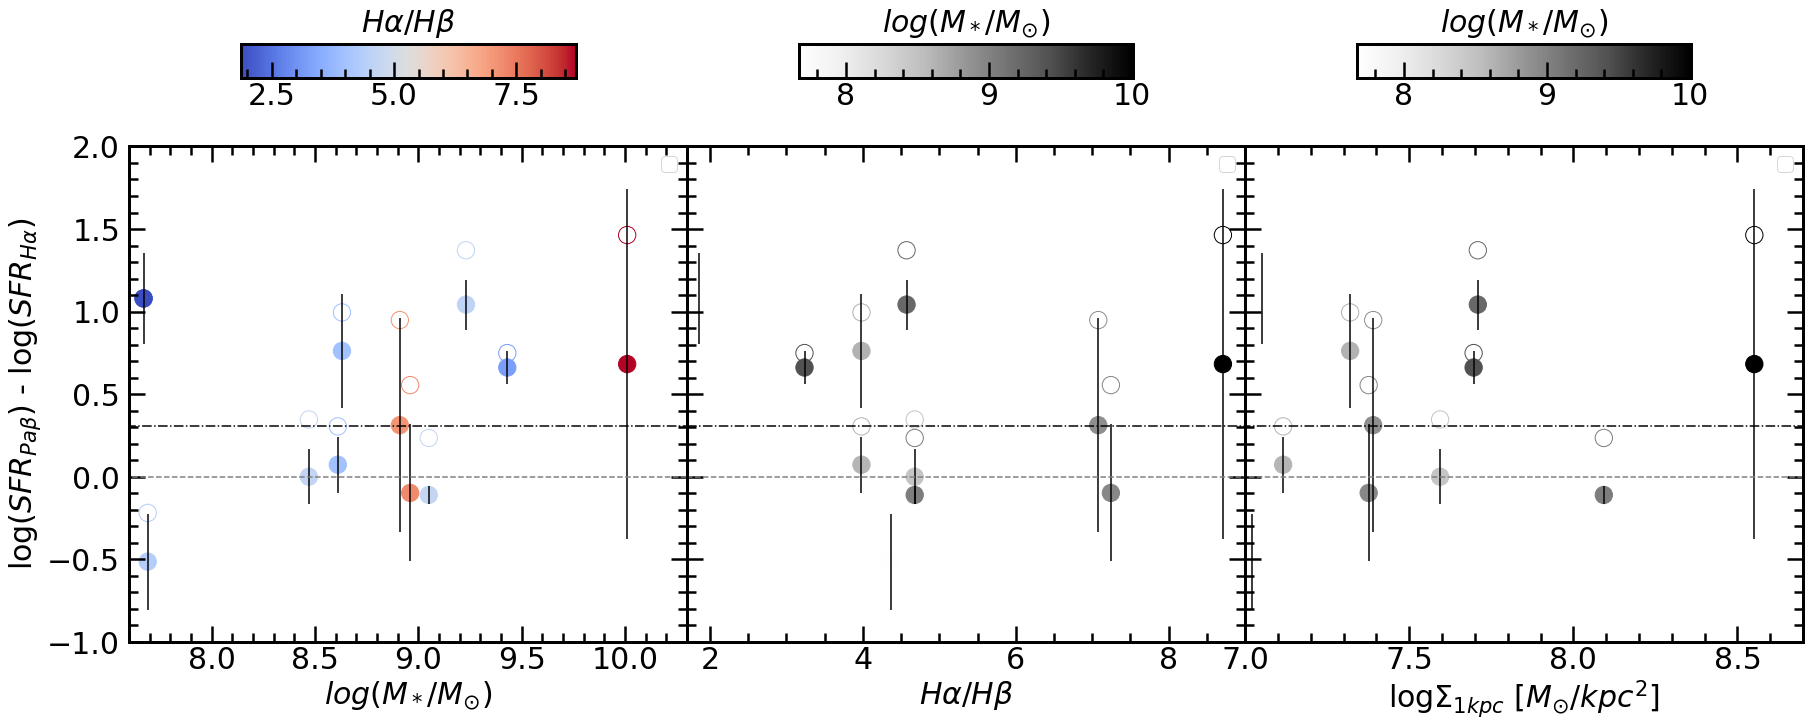

In [229]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_xlabel('$log(M_*/M_{\odot})$')
y0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
ax0.errorbar(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
scatterdots0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.plot([6 , 11] , [0.31 , 0.31] , '-.' , c = 'black')
ax0.plot([7 , 10.5] , [0 , 0] , '--' , c = 'gray')
ax0.axis([7.6 , 10.3 , -1 , 2])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{H\alpha}$)')
# for i in range(len(dcmergedf)):
#     ax0.plot([dcmergedf['td_lmass'].iloc[i] , dcmergedf['td_lmass'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
# for i in range(0, len(lmmassbalmer.chain), 25):
#     xs = np.arange(6,12)
#     ys = lmmassbalmer.chain[i]['alpha'] + xs * lmmassbalmer.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([6.5 , 10.5] , [np.mean(lmmassbalmer.chain['alpha']) + np.mean(lmmassbalmer.chain['beta'])*6.5 , np.mean(lmmassbalmer.chain['alpha']) + np.mean(lmmassbalmer.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmassbalmer.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmassbalmer.chain['beta']), 2))  )
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])  
ax1.set_xlabel(r"$H\alpha/H\beta$")
y1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'Greys')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'Greys')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
ax1.plot([1.7 , 9] , [0.31 , 0.31] , '-.' , c = 'black')
ax1.plot([1.7 , 9] , [0 , 0] , '--' , c = 'gray')
ax1.axis([1.7 , 9 , -1 , 2])
ax1.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax1.plot([dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i] , dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
# for i in range(0, len(lmbalmerbalmer.chain), 25):
#     xs = np.arange(1,10)
#     ys = lmbalmerbalmer.chain[i]['alpha'] + xs * lmbalmerbalmer.chain[i]['beta']
#     ax1.plot(xs, ys, color='gray', alpha=0.03)
# ax1.plot([1 , 10] , [np.mean(lmbalmerbalmer.chain['alpha']) + np.mean(lmbalmerbalmer.chain['beta'])*1 , np.mean(lmbalmerbalmer.chain['alpha']) + np.mean(lmbalmerbalmer.chain['beta'])*10] , c = 'black' , label = 'm = ' + str(round(np.mean(lmbalmerbalmer.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbalmerbalmer.chain['beta']), 2))  )
ax1.legend()    

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'Greys')
ax2.errorbar(dcmergedf['SIGMA_1'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
scatterdots2 = ax2.scatter(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'Greys')
scatterdots2.set_facecolor('none')
ax2.plot([5 , 10] , [0.31 , 0.31] , '-.' , c = 'black')
ax2.plot([5 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.axis([7 , 8.7 , -1, 2])
ax2.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax2.plot([dcmergedf['gf_n_j'].iloc[i] ,dcmergedf['gf_n_j'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
# for i in range(0, len(lmbalmersigma.chain), 25):
#     xs = np.arange(1,10)
#     ys = lmbalmersigma.chain[i]['alpha'] + xs * lmbalmersigma.chain[i]['beta']
#     ax2.plot(xs, ys, color='gray', alpha=0.03)
# ax2.plot([1 , 10] , [np.mean(lmbalmersigma.chain['alpha']) + np.mean(lmbalmersigma.chain['beta'])*1 , np.mean(lmbalmersigma.chain['alpha']) + np.mean(lmbalmersigma.chain['beta'])*10] , c = 'black' , label = 'm = ' + str(round(np.mean(lmbalmersigma.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbalmersigma.chain['beta']), 2))  )
ax2.legend()    
            
                                                                                    
ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$log(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$log(M_*/M_{\odot})$')
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

#fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

In [69]:
lmpabhaav = linmix.LinMix(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], [.3]* len(dcmergedf['td_Av']), dcmergedf['PABHA_ERR'], K = 2, seed = 2)
lmpabhaav.run_mcmc(silent = True) 

lmpabhabeta = linmix.LinMix(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], [.3]* len(dcmergedf['ir_UV_beta']), dcmergedf['PABHA_ERR'], K = 2, seed = 2)
lmpabhabeta.run_mcmc(silent = True) 

lmpabhaa280 = linmix.LinMix(dcmergedf['ir_A_UV_280'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], [.3]* len(dcmergedf['ir_UV_beta']), dcmergedf['PABHA_ERR'], K = 2, seed = 2)
lmpabhaa280.run_mcmc(silent = True) 


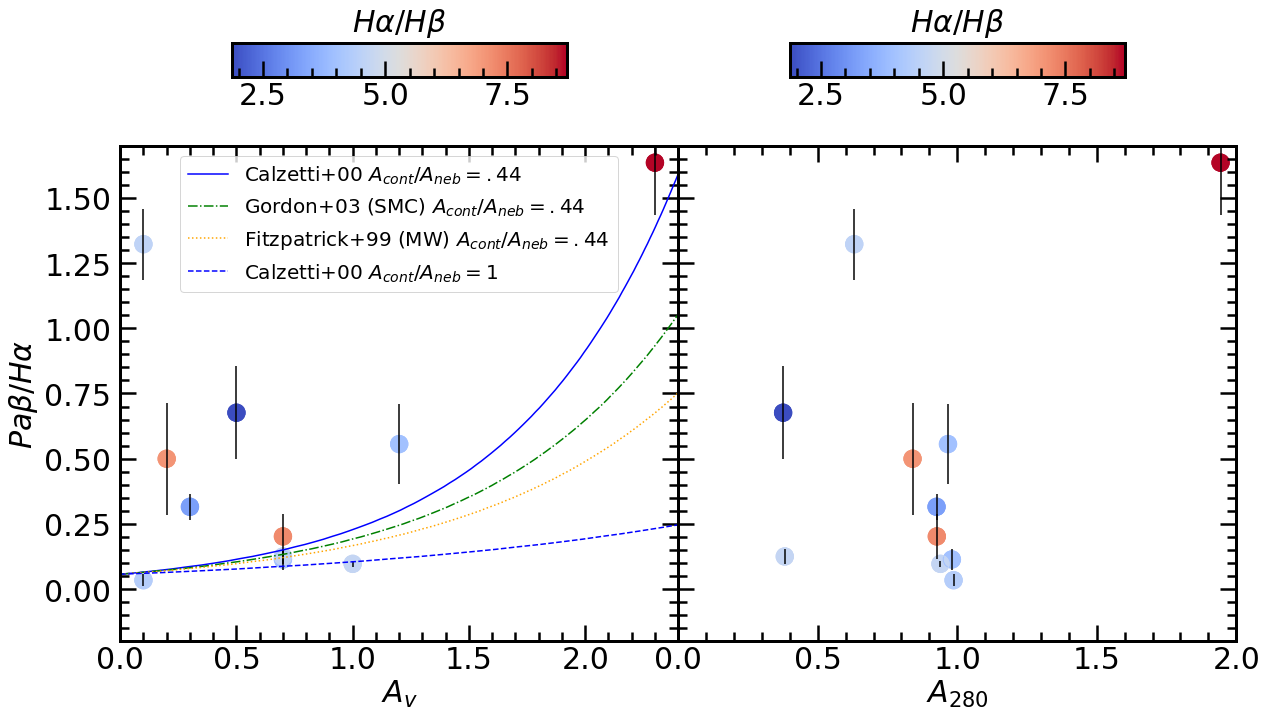

In [207]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
ax0.errorbar(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
scatterdots0 = ax0.scatter(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')

# ax0.scatter(dustcurvesdf['AV_FITZ99'] , dustcurvesdf['PABHA_FITZ99'] , s = 30, c = 'orange' , marker = '+' , label = 'Fitzpatrick+ 99')
# ax0.scatter(dustcurvesdf['AV_GORD03'] , dustcurvesdf['PABHA_GORD03'] , s = 30, c = 'green' , marker = '+' , label = 'Gordon+ 03')
ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = '-.' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = ':' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
scatterdots0.set_facecolor('none')
# ax0.set_xscale('log')
#ax0.set_yscale('log')
# for i in range(0, len(lmpabhaav.chain), 25):
#     xs = np.arange(0,4)
#     ys = lmpabhaav.chain[i]['alpha'] + xs * lmpabhaav.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
#ax0.plot([0 , 4] , [np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*0 , np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*4] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhaav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhaav.chain['beta']), 2))  )
ax0.legend(loc = 9)  
ax0.axis([0 , 2.4 , -.2 , 1.7])

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$A_{280}$")
y1 = ax1.scatter(dcmergedf['ir_A_UV_280'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
ax1.errorbar(dcmergedf['ir_A_UV_280'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
scatterdots1 = ax1.scatter(dcmergedf['ir_A_UV_280'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.tick_params(labelleft = False)
#ax1.set_xscale('log')
#ax1.set_yscale('log')
# for i in range(0, len(lmpabhabeta.chain), 25):
#     xs = np.arange(-2,3)
#     ys = lmpabhabeta.chain[i]['alpha'] + xs * lmpabhabeta.chain[i]['beta']
#     ax1.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
#ax1.legend(loc = 'upper left')
ax1.axis([0 , 2 , -.2 , 1.7])
ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
plt.show()

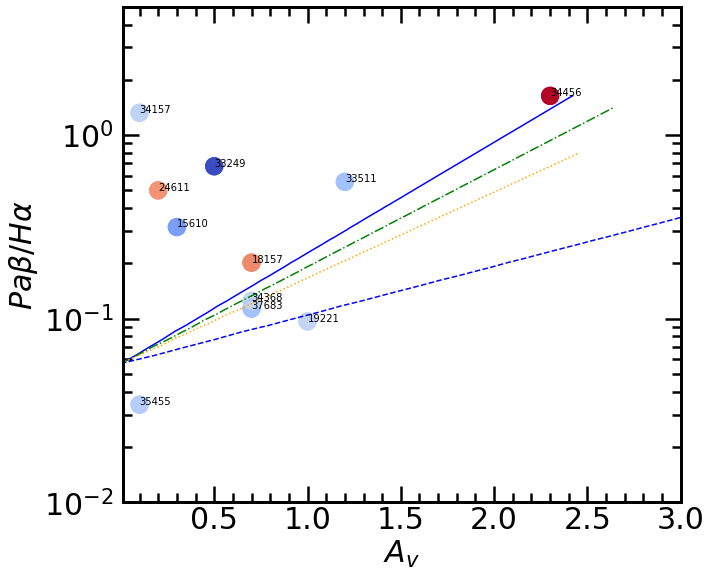

In [11]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax0.errorbar(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
for i in range(len(dcmergedf)):
    ax0.annotate(str(dcmergedf['ID'].iloc[i]) , xy = (dcmergedf['td_Av'].iloc[i], dcmergedf['PAB_FLUX'].iloc[i]/dcmergedf['HA_FLUX'].iloc[i]) , size = 10)
scatterdots0 = ax0.scatter(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = '-.' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = ':' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
scatterdots0.set_facecolor('none')
# ax0.set_xscale('log')
ax0.set_yscale('log')
# for i in range(0, len(lmpabhaav.chain), 25):
#     xs = np.arange(0,4)
#     ys = lmpabhaav.chain[i]['alpha'] + xs * lmpabhaav.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([0 , 4] , [np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*0 , np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*4] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhaav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhaav.chain['beta']), 2))  )
#ax0.legend(loc = 9)  
ax0.axis([0.01 , 3 , .01 , 5])



# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
# ax3.xaxis.set_label_position('top')
plt.show()

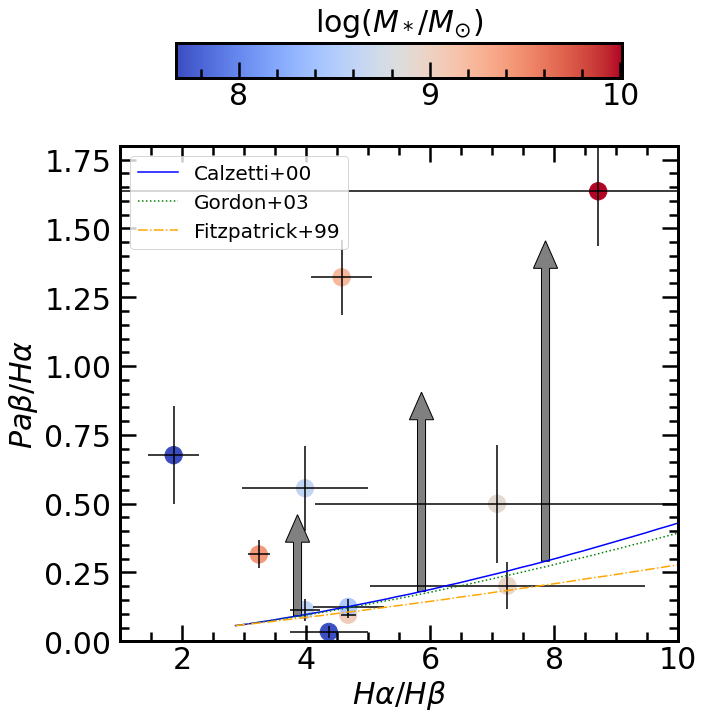

In [5]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$H\alpha/H\beta$")
y0 = ax0.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , xerr = dcmergedf['BALMER_ERR'] , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
#ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_CALZ00']*5 , c = 'blue' , label = '5 x Calzetti+00' , linestyle = '--')
ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = 'Calzetti+00')

ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = ':' , label = 'Gordon+03')
ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = '-.' , label = 'Fitzpatrick+99')
ax0.arrow(dustcurvesdf['HAHB'][5] , dustcurvesdf['PABHA_CALZ00'][5] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][5] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black')
ax0.arrow(dustcurvesdf['HAHB'][15] , dustcurvesdf['PABHA_CALZ00'][15] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][15] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black')
ax0.arrow(dustcurvesdf['HAHB'][25] , dustcurvesdf['PABHA_CALZ00'][25] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][25] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black')
ax0.axis([1 , 10 , 0 , 1.8])
ax0.legend(loc = 'upper left')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
#ax3.xaxis.set_label_pad(0.1)

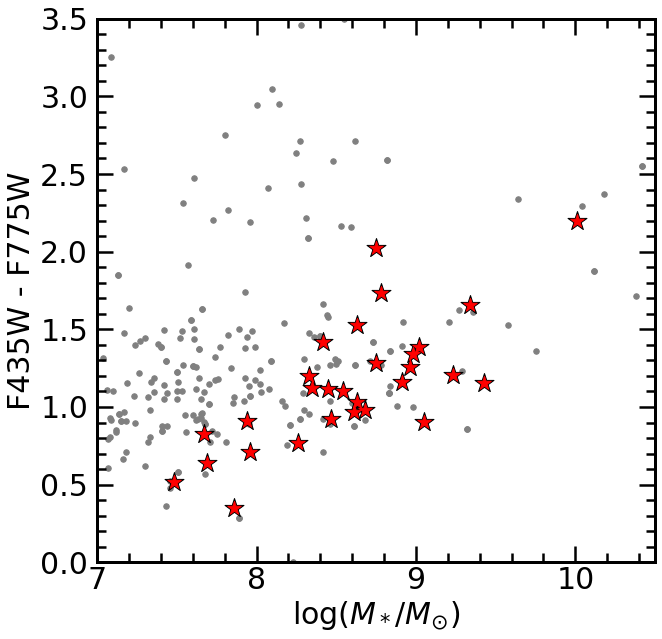

In [39]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(fullcleardf['td_lmass'] , -2.5*np.log10(fullcleardf['ACS_F435W_FLUX']/fullcleardf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 200 , c = 'red' , marker = '*')
plt.ylabel("F435W - F775W")
plt.xlabel('log$(M_*/M_{\odot})$')
plt.axis([7 , 10.5  ,  0 , 3.5])
plt.show()

In [21]:
limitpabdcdf = limitdf[['ID' , 'td_lmass' ,  'PAB_SFR_EX2_LIMIT' , 'td_Av']]

In [22]:
limitpabdcdf.to_csv('limitpabdcdf.csv' , index = False)

In [24]:
samplepabdcdf = fullmergedf[['ID' , 'td_lmass' ,  'PAB_SFR_EX2' , 'td_Av']]

In [25]:
samplepabdcdf.to_csv('samplepabdcdf.csv' , index = False)

# **Plots for Referee Report Round 4**

In [62]:
barromassdf = barrodf.query('td_lmass > 7.25')
barromidmassdf = barromiddf.query('td_lmass > 7.25')
fullmergedf['SFR1'] = fullmergedf['ir_SFR-UV_corr']
fullmergedf['SFR2'] = fullmergedf['ir_SFR-IR']
tfullmergedf =  fullmergedf.query('SFR2 > 0')
barromassdf['SFR1'] = barromassdf['ir_SFR-UV_corr']
barromassdf['SFR2'] = barromassdf['ir_SFR-IR']
tbarroirmassdf =  barromassdf.query('SFR2 > 0')
barromidmassdf['SFR1'] = barromidmassdf['ir_SFR-UV_corr']
barromidmassdf['SFR2'] = barromidmassdf['ir_SFR-IR']
tbarromidmassdf =  barromidmassdf.query('SFR2 > 0')

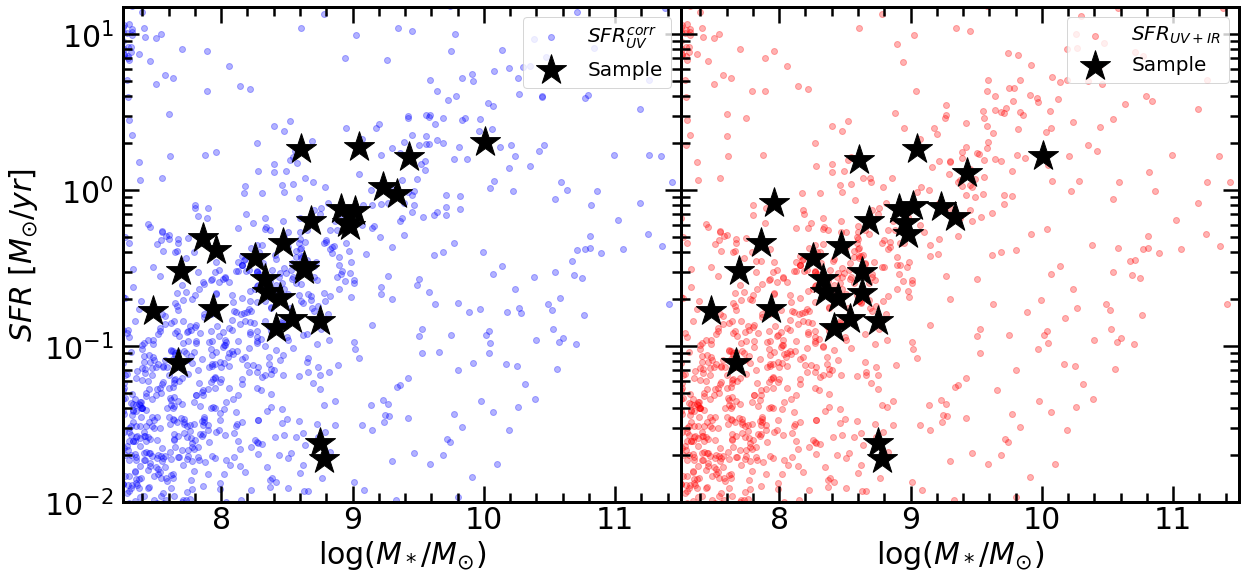

In [12]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barrodf['td_lmass'] , barrodf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
ax0.set_yscale('log')
ax0.axis([7.25 , 11.5 , .01 , 15])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barrodf['td_lmass'] , barrodf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('log$(M_*/M_{\odot})$')
ax1.set_yscale('log')
ax1.axis([7.25 , 11.5 , .01, 15])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

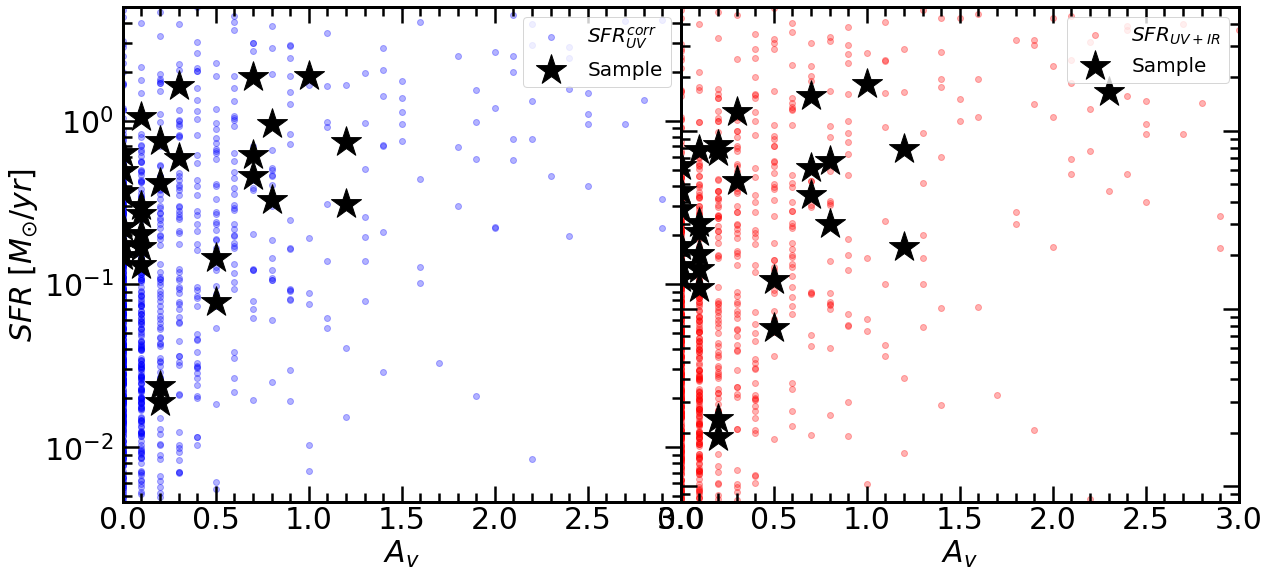

In [25]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barromassdf['td_Av'] , barromassdf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('$A_v$')
ax0.set_yscale('log')
ax0.axis([0 , 3 , 0 , 5])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barromassdf['td_Av'] , barromassdf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('$A_v$')
ax1.set_yscale('log')
ax1.axis([0 , 3 , 0 , 5])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

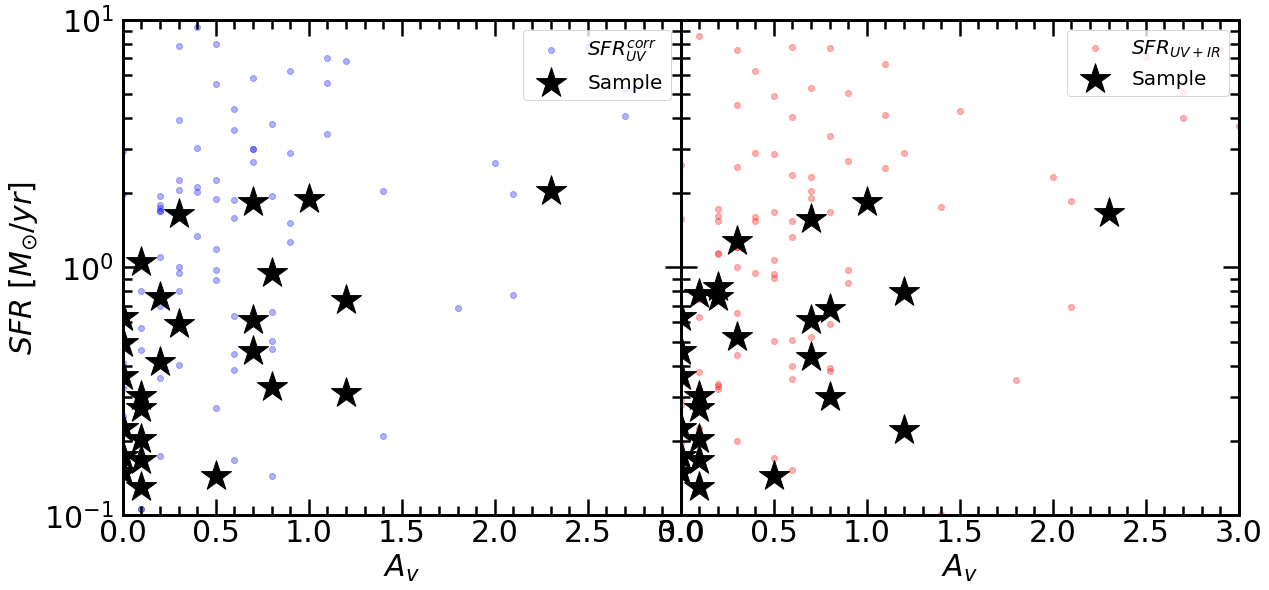

In [90]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barroirmassdf['td_Av'] , barroirmassdf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('$A_v$')
ax0.set_yscale('log')
ax0.axis([0 , 3 , 0.1 , 10])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barroirmassdf['td_Av'] , barroirmassdf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('$A_v$')
ax1.set_yscale('log')
ax1.axis([0 , 3 , 0.1 , 10])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

In [49]:
pd.set_option('display.max_rows', None)

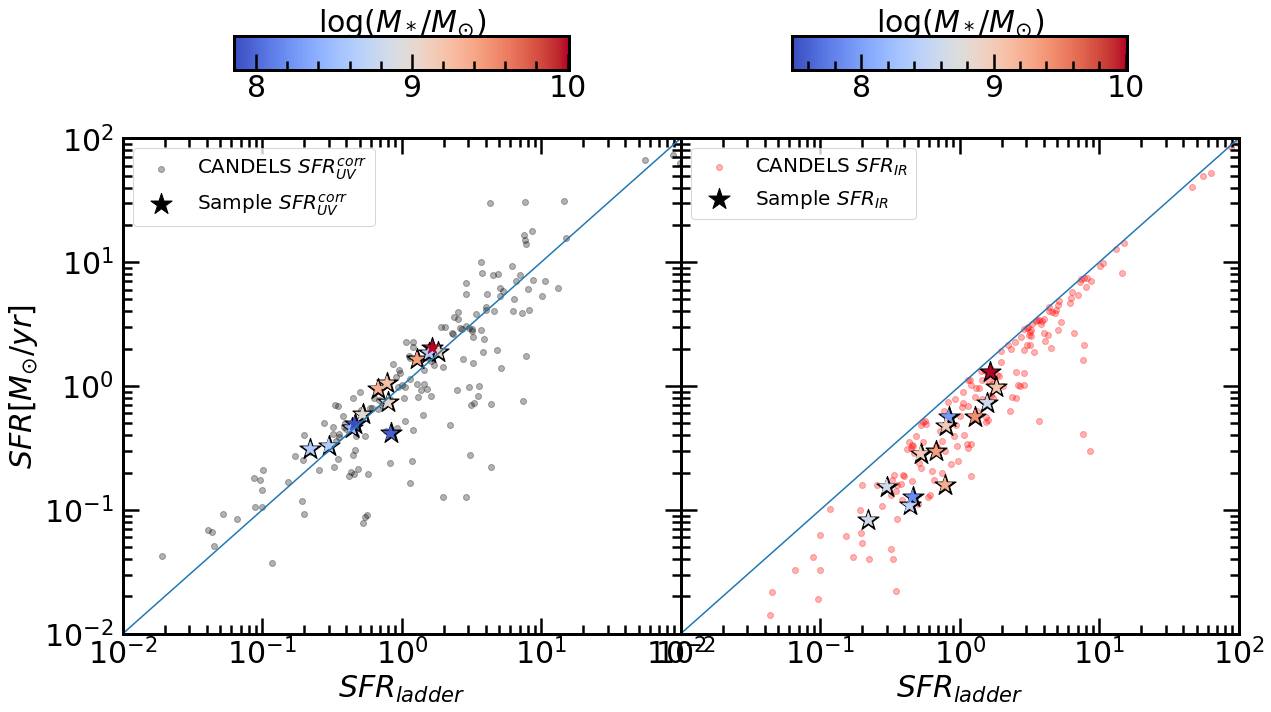

In [8]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = '3D-HST')
ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{UV}^{corr}$')
y0 = ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , c = tfullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.legend()
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([0.01 , 100 , 0.01 , 100])
ax0.plot([.01 , 100] , [.01 , 100])

ax1 = fig.add_subplot(gs[2:12, 5:10])
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = '3D-HST')
ax1.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{IR}$')
y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('$SFR_{ladder}$')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([0.01 , 100 , 0.01 , 100])
ax1.plot([.01 , 100] , [.01 , 100])
ax1.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')

ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')

In [28]:
print(len(tbarroirmassdf[abs(np.log10(tbarroirmassdf['ir_SFR-UV_corr']) - np.log10(tbarroirmassdf['ir_SFR-ladder_total']) > 1)]))

6


In [29]:
print(len(tbarroirmassdf))

212


In [33]:
1-6/212

0.9716981132075472

In [22]:
print(len(tbarromidmassdf[abs(np.log10(tbarromidmassdf['ir_SFR-UV_corr']) - np.log10(tbarromidmassdf['ir_SFR-ladder_total']) > .5)]))

42


In [21]:
print(len(tbarromidmassdf))

1260


In [24]:
42/1260

0.03333333333333333

In [19]:
print(len(tbarromidmassdf[abs(np.log10(tbarromidmassdf['ir_SFR-UV_corr']) - np.log10(tbarromidmassdf['ir_SFR-ladder_total']) > 1)]))

7


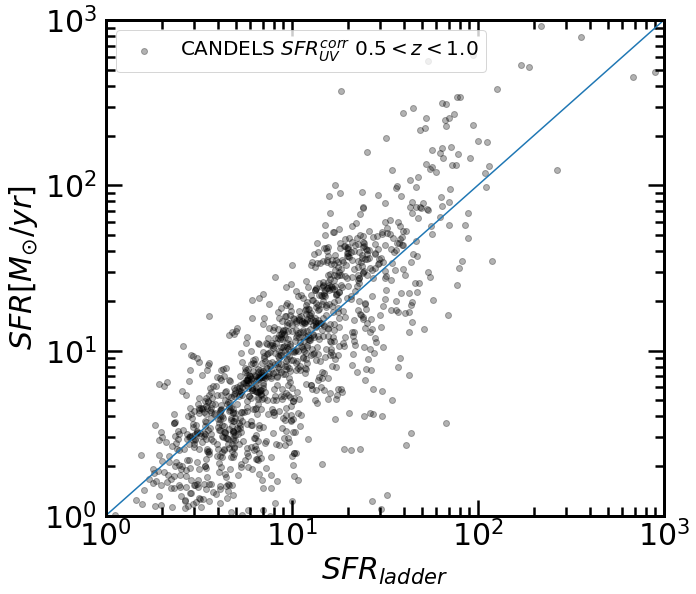

In [14]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarromidmassdf['ir_SFR-ladder_total'] , tbarromidmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$ $0.5 < z < 1.0$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = '3D-HST')
# ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{UV}^{corr}$')
# y0 = ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , c = tfullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.legend()
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([1 , 1000 , 1 , 1000])
ax0.plot([.1 , 1000] , [.1 , 1000])

# ax1 = fig.add_subplot(gs[2:12, 5:10])
# # ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = '3D-HST')
# ax1.scatter(barromidmassdf['ir_SFR-ladder_total'] , barromidmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# # ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{IR}$')
# # y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
# ax1.set_xlabel('$SFR_{ladder}$')
# ax1.legend()
# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.axis([0.01 , 100 , 0.01 , 100])
# ax1.plot([.01 , 100] , [.01 , 100])
# ax1.tick_params(labelleft = False)

# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax3.xaxis.set_label_position('top')

# ax4 = fig.add_subplot(gs[0:1,6:9])
# fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax4.xaxis.set_label_position('top')

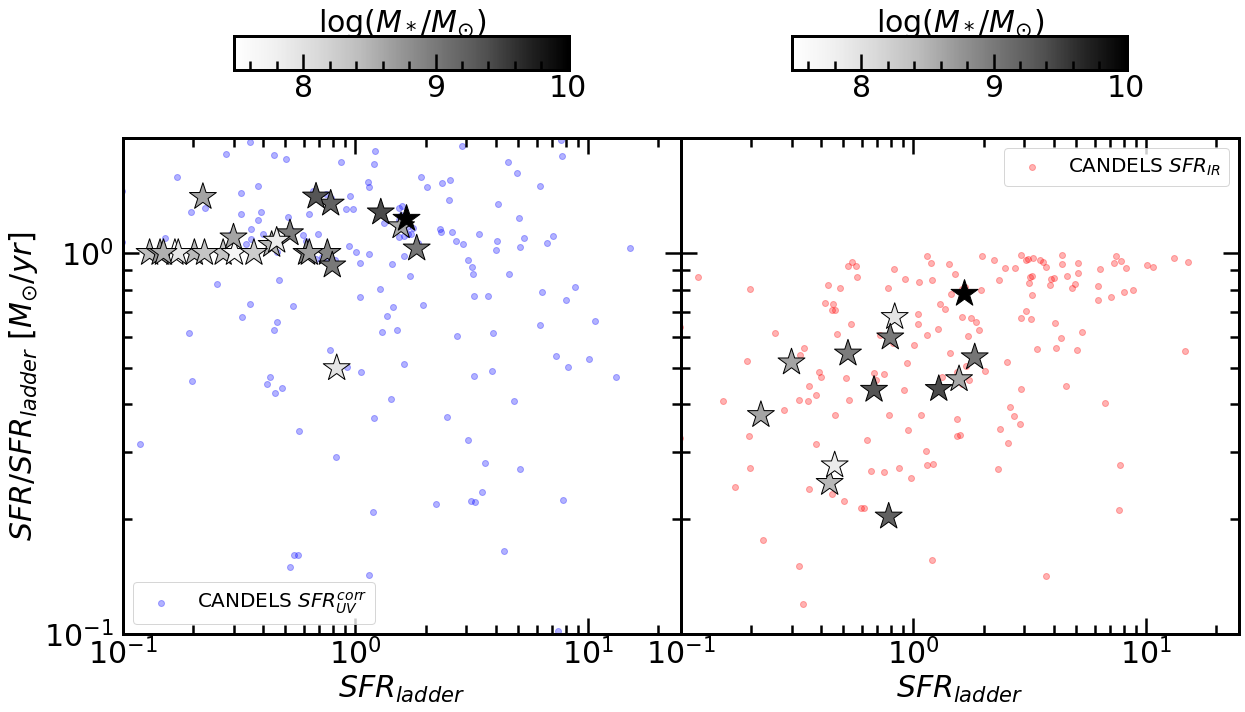

In [70]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'blue' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-UV_corr']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'], ec='black' , cmap = 'Greys' , marker = '*' , s = 800)
ax0.set_ylabel('$SFR/SFR_{ladder}~$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([0.1 , 25 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'], ec='black' , cmap = 'Greys' , marker = '*' , s = 800)
ax1.set_xlabel('$SFR_{ladder}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([0.1 , 25 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend()
ax1.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')

ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')

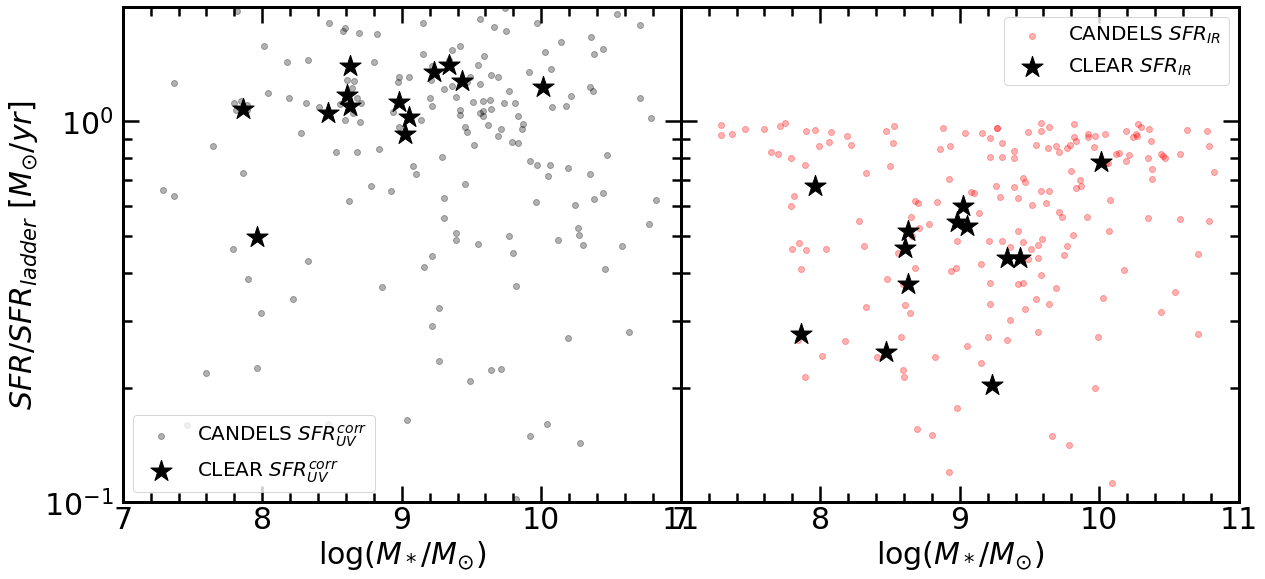

In [43]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $SFR_{UV}^{corr}$')
# y0 = ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR/SFR_{ladder}~$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([7 , 11 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-IR']/tfullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $SFR_{IR}$')
# y1 = ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-IR']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('log$(M_*/M_{\odot})$')
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([7 , 11 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend()
ax1.tick_params(labelleft = False)

# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax3.xaxis.set_label_position('top')

# ax4 = fig.add_subplot(gs[0:1,6:9])
# fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax4.xaxis.set_label_position('top')

(array([ 6., 20., 11., 24., 20., 28., 38., 26., 20., 11.]),
 array([ 7.29 ,  7.645,  8.   ,  8.355,  8.71 ,  9.065,  9.42 ,  9.775,
        10.13 , 10.485, 10.84 ]),
 <BarContainer object of 10 artists>)

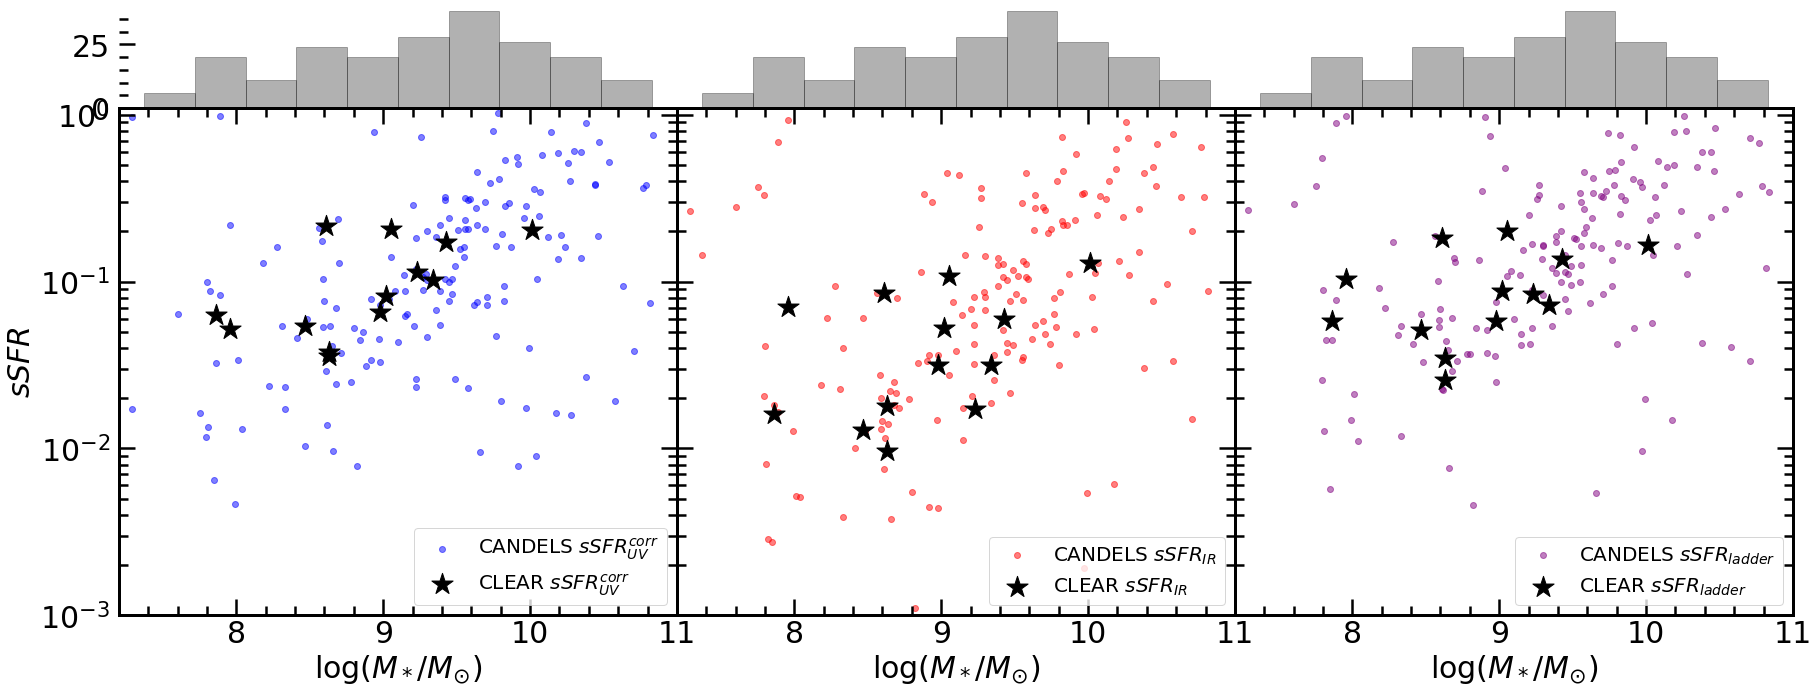

In [159]:
fig = plt.figure(figsize = (30 , 14))
gs = GridSpec(nrows=15, ncols=15)
gs.update(wspace = 0, hspace = 0)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['td_lmass'] , c = 'blue' , alpha = .5 , label = 'CANDELS $sSFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{UV}^{corr}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$sSFR$' )
ax0.set_xlabel('log$(M_*/M_{\odot})$')

# ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend(loc = 4)

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['td_lmass'] , c = 'red' , alpha = .5 , label = 'CANDELS $sSFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-IR']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{IR}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend(loc = 4)
ax1.tick_params(labelleft = False)

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-ladder_total']/tbarroirmassdf['td_lmass'] , c = 'purple' , alpha = .5 , label = 'CANDELS $sSFR_{ladder}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax2.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-ladder_total']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{ladder}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax2.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax2.set_yscale('log')
ax2.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax2.legend(loc = 4)
ax2.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:2, 0:5], frameon=False)
ax3.tick_params(right = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax3.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

ax4 = fig.add_subplot(gs[0:2, 5:10], frameon=False)
ax4.tick_params( left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax4.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

ax5 = fig.add_subplot(gs[0:2, 10:15], frameon=False)
ax5.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax5.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

In [5]:
import plotfunctions

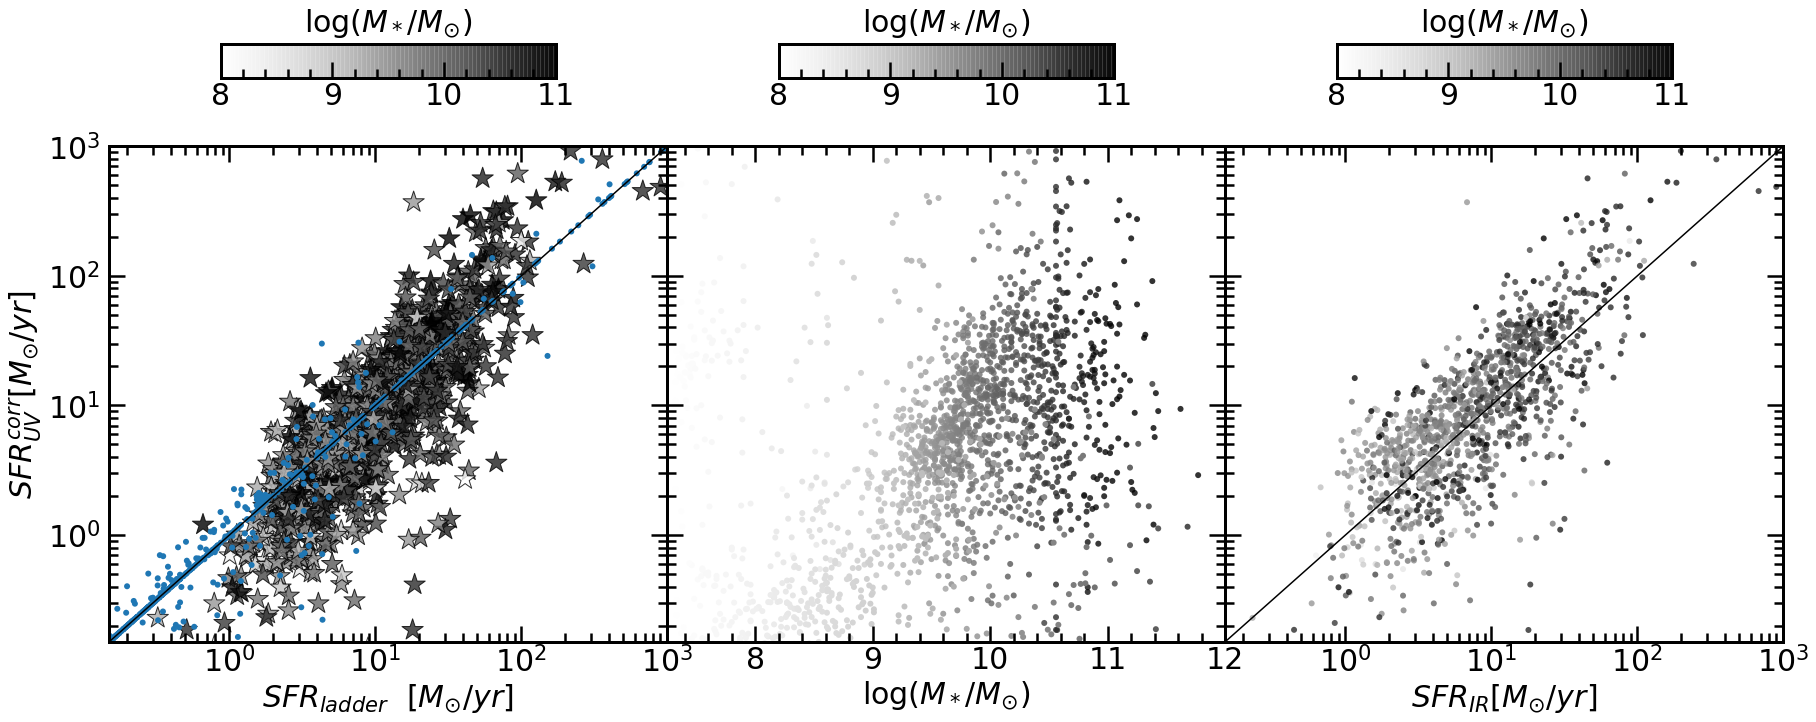

In [8]:
plotfunctions.panelfig(npanels=3,
           x0=tbarromidmassdf['ir_SFR-ladder_total'] , y0=tbarromidmassdf['ir_SFR-UV_corr'],marker0='*', s0=500,
           x0_1=barromassdf['ir_SFR-ladder_total'] , y0_1=barromassdf['ir_SFR-UV_corr'],
           xmin0=.15, xmax0=1000, ymin0=.15, ymax0=1000, 
           c0=tbarromidmassdf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{ladder}~$ [$M_{\odot}/yr$]', ylabel0='$SFR_{UV}^{corr}$' '[$M_{\odot}/yr$]', xscale0='log', yscale0='log', 
           line0=[.15,1000,.15,1000], 
           cmap0='Greys', vmin0=8, vmax0=11, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=tbarromidmassdf['td_lmass'] , y1=tbarromidmassdf['ir_SFR-UV_corr'], c1=tbarromidmassdf['td_lmass'], alpha1=.8,cmap1='Greys',
           x1_1=barromassdf['td_lmass'] , y1_1=barromassdf['ir_SFR-UV_corr'], c1_1=barromassdf['td_lmass'],cmap1_1='Greys',
           xmin1=7.25, xmax1=12, ymin1=.15, ymax1=1000, 
            
           xlabel1 ='log$(M_*/M_{\odot})$', yscale1='log',  
           vmin1=8, vmax1=11, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
           x2=tbarromidmassdf['ir_SFR-IR'] , y2=tbarromidmassdf['ir_SFR-UV_corr'], 
           xmin2=.15, xmax2=1000, ymin2=.15, ymax2=1000, 
           c2=tbarromidmassdf['td_lmass'], alpha2=.8, 
           line2=[.1,1000,.1,1000],
           xlabel2 ='$SFR_{IR}$' '[$M_{\odot}/yr$]', xscale2='log', yscale2='log',  
           cmap2='Greys', vmin2=8, vmax2=11, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

In [80]:
fullmergedf['Z_50'].median()

0.2343339459532293

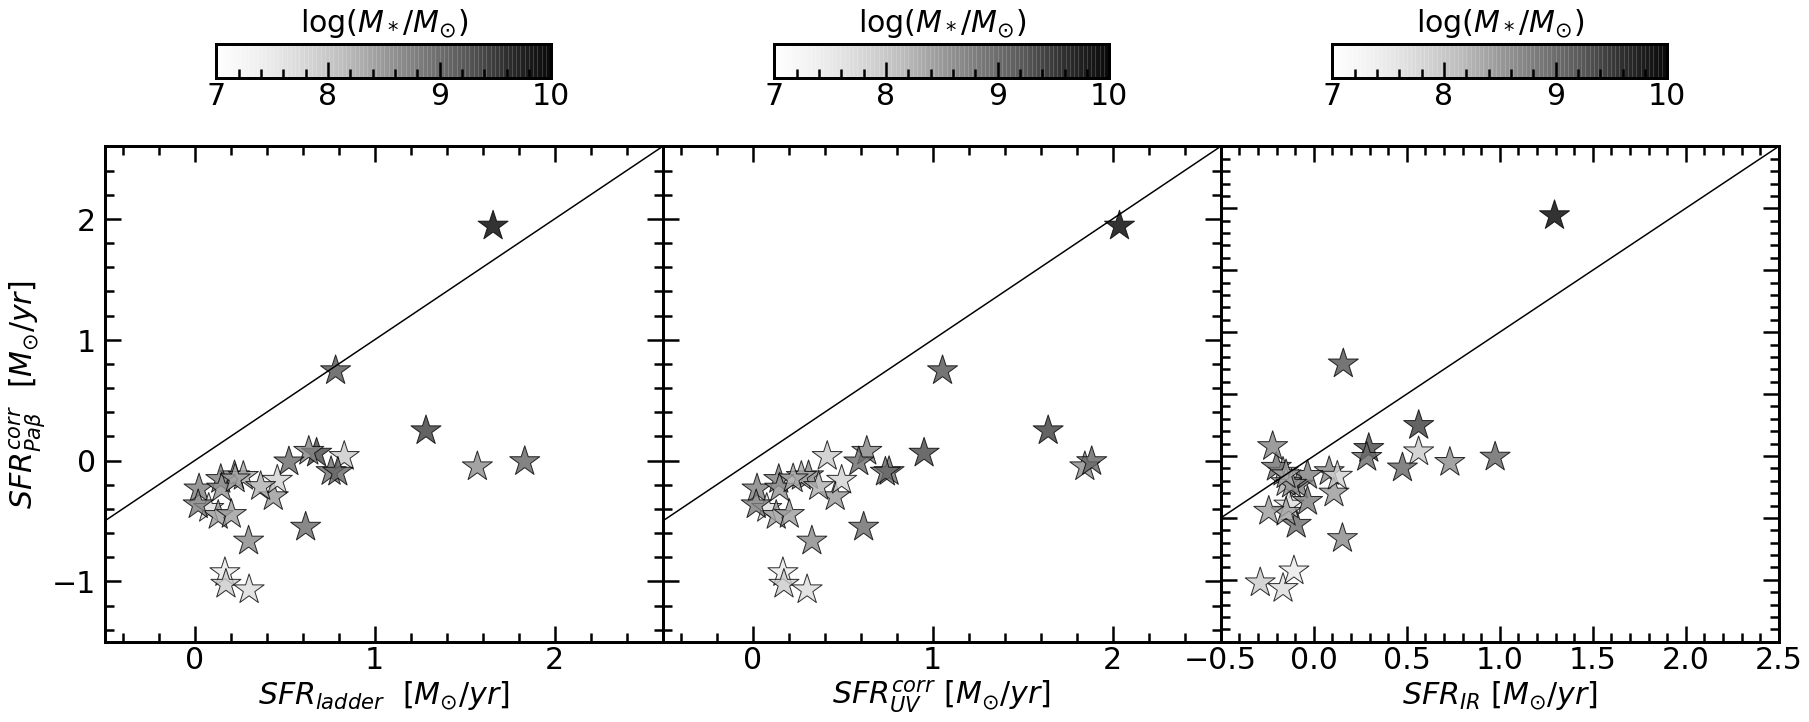

In [74]:
plotfunctions.panelfig(npanels=3,
           x0=dcsampledf['ir_SFR-ladder_total'] , y0=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker0='*', s0=1000,
           xmin0=-.5, xmax0=2.6, ymin0=-1.5, ymax0=2.6, 
           c0=fullmergedf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{ladder}~$ [$M_{\odot}/yr$]', ylabel0=r'$SFR_{Pa\beta}^{corr}~$ [$M_{\odot}/yr$]',  
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=dcsampledf['ir_SFR-UV_corr'] , y1=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker1='*', s1=1000,
           xmin1=-.5, xmax1=2.6, ymin1=-1.5, ymax1=2.6, 
           c1=fullmergedf['td_lmass'], ec1='black', alpha1=.8,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='$SFR_{UV}^{corr}~$' '[$M_{\odot}/yr$]',  
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
         
           x2=fullmergedf['ir_SFR-IR'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-.5, xmax2=2.5, ymin2=-1.5, ymax2=2.5, 
           c2=fullmergedf['td_lmass'], ec2='black', alpha2=.8, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2 ='$SFR_{IR}~$' '[$M_{\odot}/yr$]',  
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

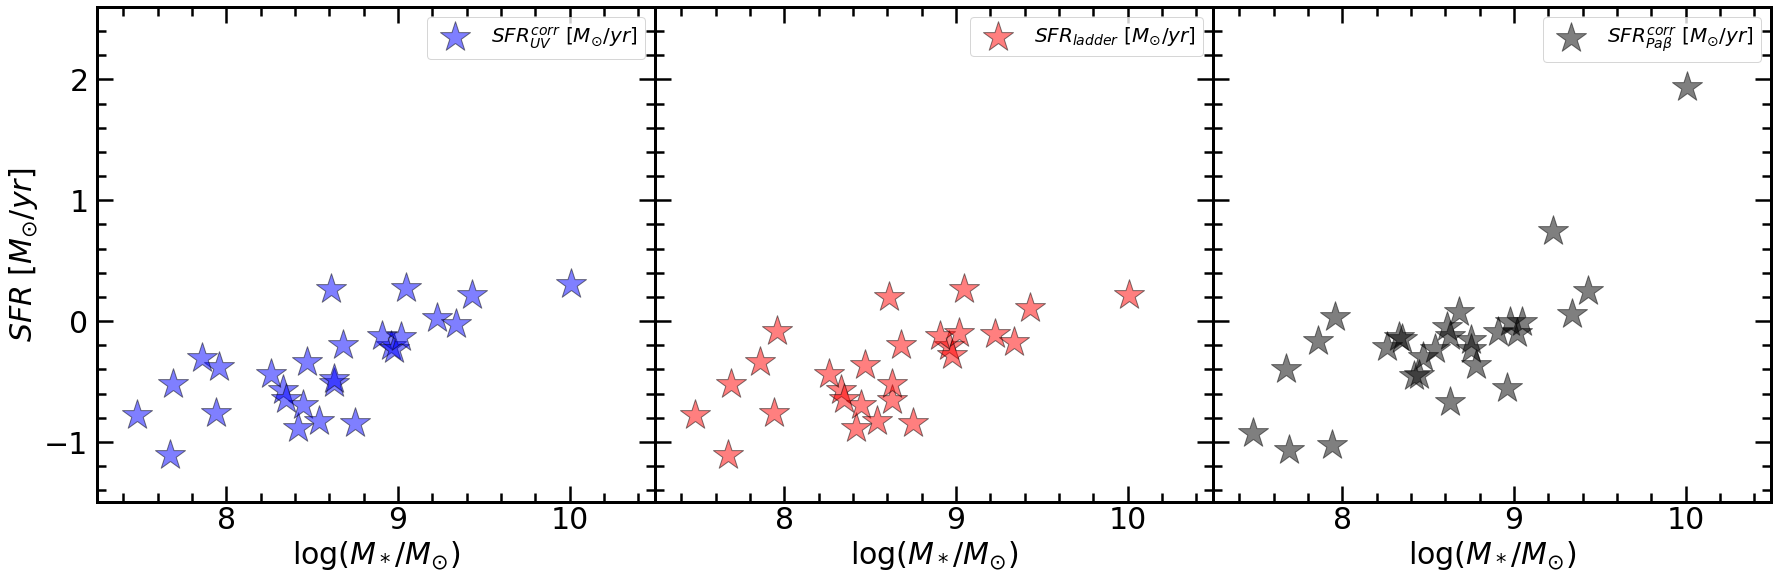

In [315]:
plotfunctions.panelfig(npanels=3,
           x0=dcsampledf['td_lmass'] , y0=np.log10(dcsampledf['ir_SFR-UV_corr']),marker0='*', s0=1000,
           xmin0=7.25, xmax0=10.5, ymin0=-1.5, ymax0=2.6, 
           c0='blue', ec0='black', alpha0=.5, 
           xlabel0= 'log$(M_*/M_{\odot})$', label0=r'$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]', ylabel0=r'$SFR~[M_{\odot}/yr]$',
#            line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=False,
           
           x1=dcsampledf['td_lmass'] , y1=np.log10(dcsampledf['ir_SFR-ladder_total']),marker1='*', s1=1000,
           xmin1=7.25, xmax1=10.5, ymin1=-1.5, ymax1=2.6, 
           c1='red', ec1='black', alpha1=.5,
#            line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='log$(M_*/M_{\odot})$', label1=r'$SFR_{ladder}~[M_{\odot}/yr]$',
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=False,
         
           x2=fullmergedf['td_lmass'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=7.25, xmax2=10.5, ymin2=-1.5, ymax2=2.6, 
           c2='black', ec2='black', alpha2=.5, 
#            line2=[-2.6,2.6,-2.6,2.6],
           xlabel2='log$(M_*/M_{\odot})$', label2=r'$SFR_{Pa\beta}^{corr}~[M_{\odot}/yr]$',
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=False)

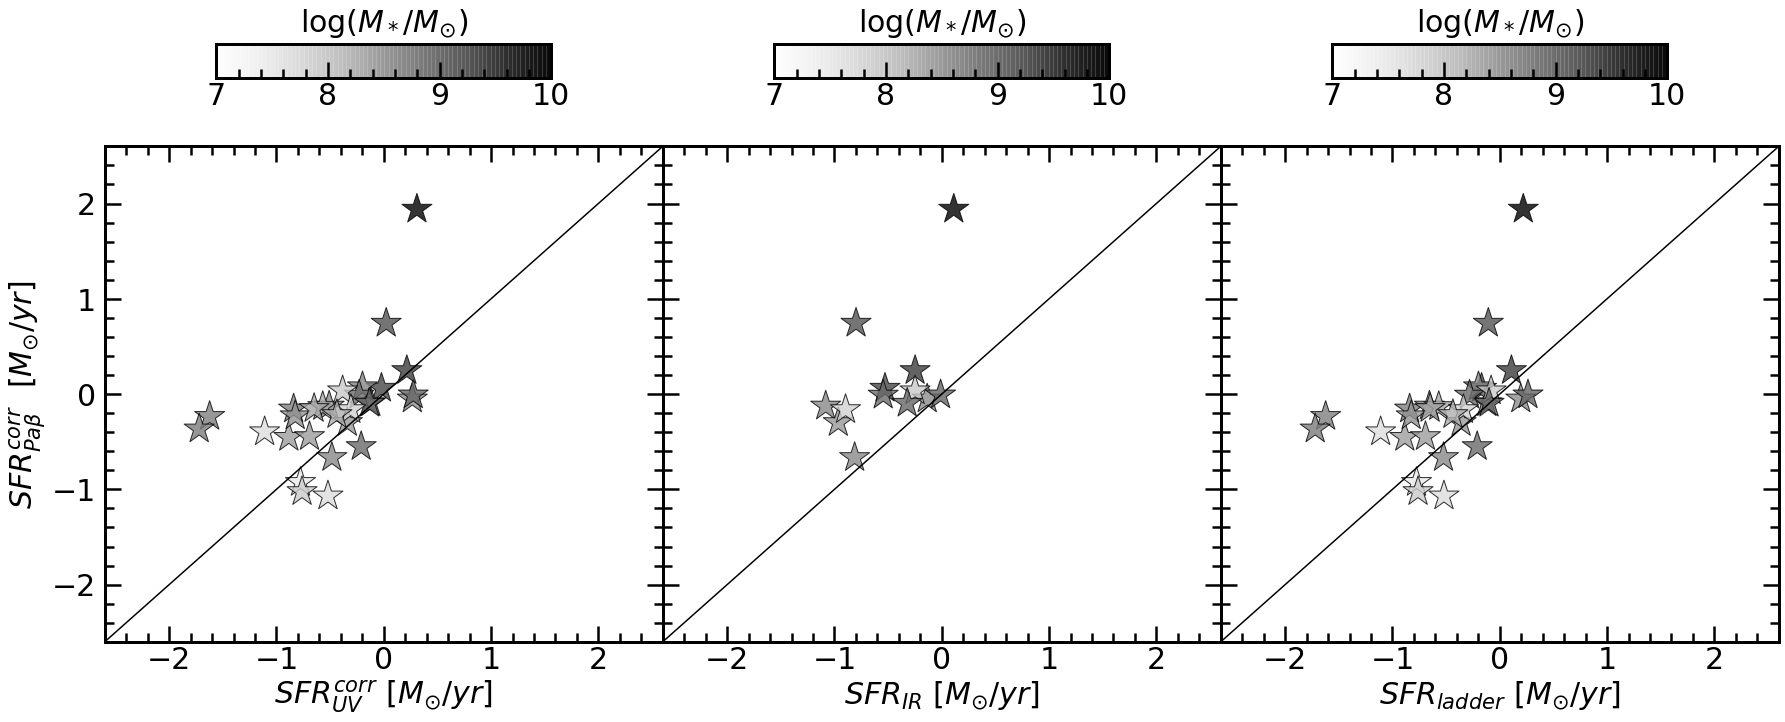

In [319]:
plotfunctions.panelfig(npanels=3,
           x0=np.log10(dcsampledf['ir_SFR-UV_corr']) , y0=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker0='*', s0=1000,
           xmin0=-2.6, xmax0=2.6, ymin0=-2.6, ymax0=2.6, 
           c0=fullmergedf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{UV}^{corr}~$[$M_{\odot}/yr$]', ylabel0=r'$SFR_{Pa\beta}^{corr}~$ [$M_{\odot}/yr$]',  
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=np.log10(dcsampledf['ir_SFR-IR']) , y1=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker1='*', s1=1000,
           xmin1=-2.6, xmax1=2.6, ymin1=-2.6, ymax1=2.6, 
           c1=fullmergedf['td_lmass'], ec1='black', alpha1=.8,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='$SFR_{IR}~$''[$M_{\odot}/yr$]',  
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
         
           x2=np.log10(fullmergedf['ir_SFR-ladder_total']) , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-2.6, xmax2=2.6, ymin2=-2.6, ymax2=2.6, 
           c2=fullmergedf['td_lmass'], ec2='black', alpha2=.8, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2 ='$SFR_{ladder}~$''[$M_{\odot}/yr$]',  
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

In [7]:
pfdupe.panelfig(npanels=3,
           x0=dcsampledf['ir_SFR-ladder_total'] , y0=dcsampledf['ir_SFR-UV_corr'],marker0='*', s0=1000,
           xmin0=-1.5, xmax0=2.6, ymin0=-1.5, ymax0=2.6, 
           c0='blue', ec0='black', alpha0=.5, 
           xlabel0= r'$SFR_{ladder}~[M_{\odot}/yr]$', label0=r'$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]', ylabel0=r'$SFR~[M_{\odot}/yr]$',
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=False,
           
           x1=dcsampledf['ir_SFR-ladder_total'] , y1=dcsampledf['ir_SFR-IR'],marker1='*', s1=1000,
           xmin1=-1.5, xmax1=2.6, ymin1=-1.5, ymax1=2.6, 
           c1='red', ec1='black', alpha1=.5,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1=r'$SFR_{ladder}~[M_{\odot}/yr]$', label1=r'$SFR_{IR}~[M_{\odot}/yr]$',
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=False,
         
           x2=fullmergedf['ir_SFR-ladder_total'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-1.5, xmax2=2.6, ymin2=-1.5, ymax2=2.6, 
           c2='black', ec2='black', alpha2=.5, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2=r'$SFR_{ladder}~[M_{\odot}/yr]$', label2=r'$SFR_{Pa\beta}^{corr}~[M_{\odot}/yr]$',
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=False)

NameError: name 'npanels' is not defined

In [29]:
fullmergedfsnr3=fullmergedf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
fullmergedfsnr3s=fullmergedf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
fullmergedfsnr3.to_csv('fullmergedfsnr3.csv', index=False)
fullmergedfsnr3s.to_csv('fullmergedfsnr3s.csv', index=False)

morphdfsnr3=morphdf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
morphdfsnr3s=morphdf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
morphdfsnr3.to_csv('morphdfsnr3.csv', index=False)
morphdfsnr3s.to_csv('morphdfsnr3s.csv', index=False)

dcmorphdfsnr3=dcmorphdf.query('PAB_FLUX_x/PAB_FLUX_ERR_x > 3')
dcmorphdfsnr3s=dcmorphdf.query('PAB_FLUX_x/PAB_FLUX_ERR_x < 3')
dcmorphdfsnr3.to_csv('dcmorphdfsnr3.csv', index=False)
dcmorphdfsnr3s.to_csv('dcmorphdfsnr3s.csv', index=False)

dcmergedfsnr3=dcmergedf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
dcmergedfsnr3s=dcmergedf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
dcmergedfsnr3.to_csv('dcmergedfsnr3.csv', index=False)
dcmergedfsnr3s.to_csv('dcmergedfsnr3s.csv', index=False)

dcsampledfsnr3=dcsampledf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
dcsampledfsnr3s=dcsampledf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
dcsampledfsnr3.to_csv('dcsampledfsnr3.csv', index=False)
dcsampledfsnr3s.to_csv('dcsampledfsnr3s.csv', index=False)

In [31]:
display(dcmorphdfsnr3)

,FIELD_x,ID_x,RA_x_x,DEC_x_x,Z_50_x,Z_ERR_x,PAB_FLUX_x,PAB_FLUX_ERR_x,OBS_PAB_x,id3DHST_x,...,PAB_SFR_LL_y,PAB_SFR_EX2_LL_y,PAB_SFR_LL_1SIGMA_y,PAB_SFR_EX_LL_1SIGMA_y,id,sfrratio,sfrratio_calz,calzfactor,sfrratio_mw,mwfactor
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,19.445505,2.126779,14610.064284,19221,...,-1.794139,-2.069013,-1.981966,-2.256839,19221,-0.28,-0.04,1.74,-0.06,1.67
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,14.520550,2.317139,15374.278308,15610,...,-1.453302,-1.668474,-1.641128,-1.856300,15610,-0.01,0.07,1.18,0.06,1.17
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,27.507629,2.862229,15695.781592,34456,...,-1.396135,-1.705231,-1.583962,-1.893057,34456,0.23,0.79,3.57,0.75,3.27
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,28.282754,2.688524,15962.430241,34157,...,-1.250334,-1.273352,-1.438161,-1.461178,34157,0.68,0.70,1.06,0.70,1.05
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,6.159068,1.908827,15961.576268,33397,...,-1.250603,-1.229179,-1.438429,-1.417006,33397,0.06,0.25,1.56,0.24,1.51
8,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808,1.187729,16107.064381,33511,...,-1.205809,-0.697171,-1.393636,-0.884998,33511,0.44,0.73,1.94,0.71,1.86
9,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371,0.995737,15748.400334,34368,...,-1.319804,-0.980695,-1.507630,-1.168521,34368,0.14,0.30,1.47,0.29,1.43
10,GN3,34077,189.210930,62.317701,0.248121,0.013336,4.116922,0.936845,16000.907312,34077,...,-1.238309,-0.669684,-1.426135,-0.857510,34077,0.45,0.47,1.06,0.47,1.05
13,GN5,33249,189.207722,62.311096,0.234334,0.127937,3.122788,0.794631,15824.161187,33249,...,-1.294695,-0.184642,-1.482522,-0.372468,33249,0.81,0.93,1.32,0.92,1.29
14,GS2,45518,53.154087,-27.697930,0.281881,0.005265,4.871179,1.059491,16433.719756,45518,...,-1.111521,-0.913312,-1.299348,-1.101138,45518,0.27,0.27,1.00,0.27,1.00
